Importing Libraries & Packages

In [1]:
#Importing Libraries & Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
from datetime import timedelta

Loading Datasets for 7 Weather Stations

In [2]:
#Loading Datasets for 7 Weather Stations

heathrow = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/Heathrow Hourly 1_11_2011-31_3_2014.xlsx', sheet_name='DATA', header=2)
gravesend = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/Gravesend Broadness Hourly 1_11_2011-31_3_2014.xlsx', sheet_name='DATA', header=2)
kenley = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/Kenley Airfield Hourly 1_11_2011-31_3_2014.xlsx', sheet_name='DATA', header=2)
northolt = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/Northolt Hourly 1_11_2011-31_3_2014.xlsx', sheet_name='DATA', header=2)
stjamespark = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/LondonStJamesPark2011_2014.xlsx', sheet_name='DATA', header=2)
kewgardens = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/KewGardens2011_2014.xlsx', sheet_name='DATA', header=2)
hampstead = pd.read_excel('/Users/rosaliapujols/Desktop/Dissertation/Code/Weather/Hampstead2011_2014.xlsx', sheet_name='DATA', header=2)

Creating Datetime Index

In [3]:
#Creating Datetime Index

def create_datetime_index(df):
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'].astype(str) + ':00', dayfirst=True)
    df.set_index('Datetime', inplace=True)
    return df.drop(columns=['Date', 'Hour'])

heathrow = create_datetime_index(heathrow)
gravesend = create_datetime_index(gravesend)
kenley = create_datetime_index(kenley)
northolt = create_datetime_index(northolt)
stjamespark = create_datetime_index(stjamespark)
kewgardens = create_datetime_index(kewgardens)
hampstead = create_datetime_index(hampstead)

Filtering by 2013

In [4]:
#Filtering by 2013

heathrow = heathrow[heathrow.index.year == 2013]
gravesend = gravesend[gravesend.index.year == 2013]
kenley = kenley[kenley.index.year == 2013]
northolt = northolt[northolt.index.year == 2013]
stjamespark = stjamespark[stjamespark.index.year == 2013]
kewgardens = kewgardens[kewgardens.index.year == 2013]
hampstead = hampstead[hampstead.index.year == 2013]

Replacing "-" and "Trace" with Missing Value

In [5]:
#Replacing "-" and "Trace" with Missing Value

def clean_data(df):
    df = df.copy()
    df.replace({"-": np.nan, "Trace": np.nan, "n/a": np.nan}, inplace=True)
    return df.apply(pd.to_numeric, errors='coerce')


heathrow = clean_data(heathrow)
gravesend = clean_data(gravesend)
kenley = clean_data(kenley)
northolt = clean_data(northolt)
stjamespark = clean_data(stjamespark)
kewgardens = clean_data(kewgardens)
hampstead = clean_data(hampstead)

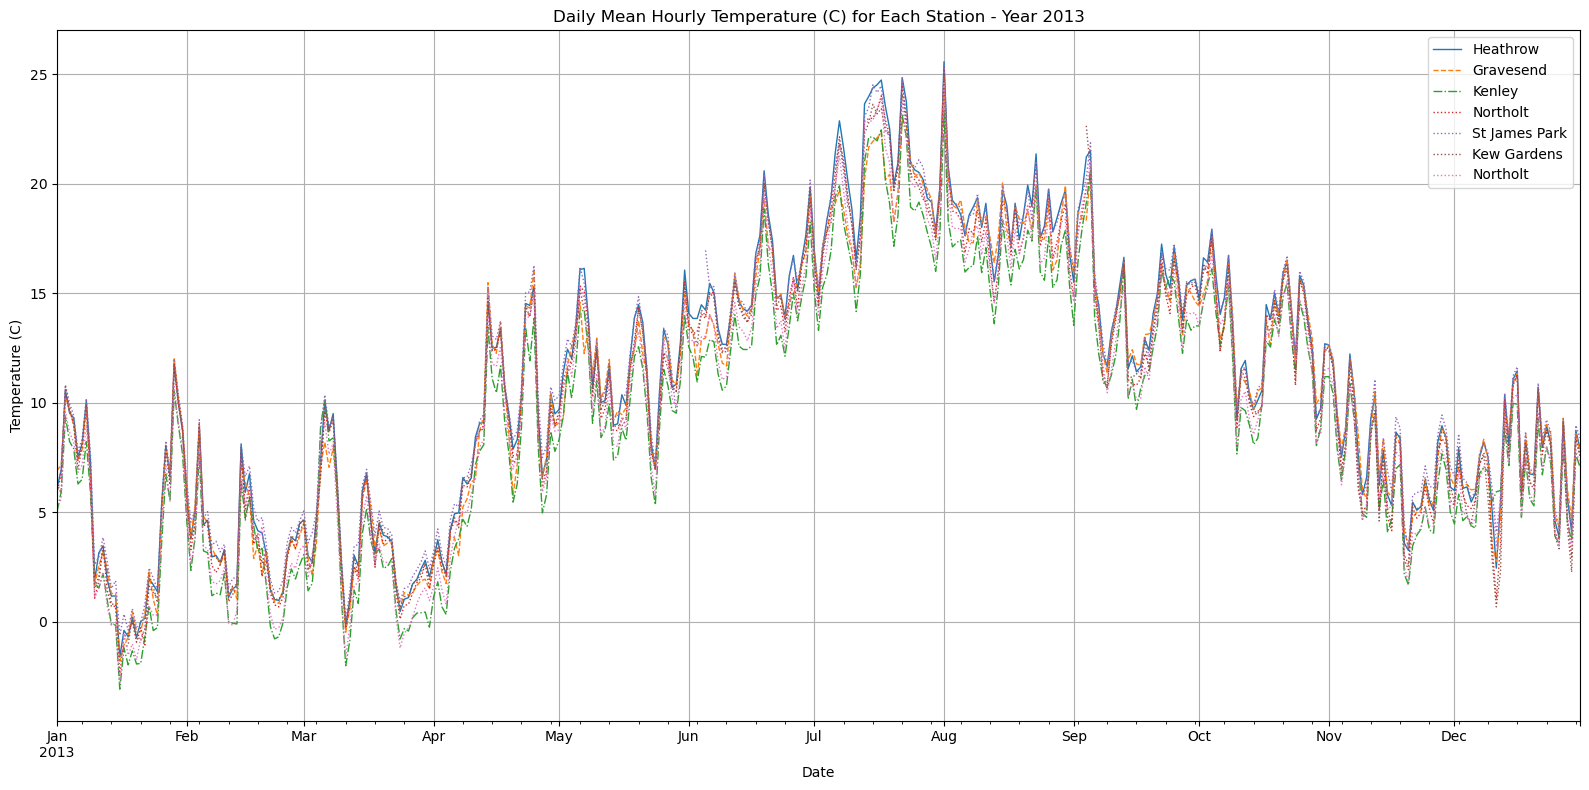

In [6]:
#Computing the daily mean for 'Hourly Temperature (C)' for each station
heathrow_daily_mean = heathrow['Hourly Temperature (C)'].resample('D').mean()
gravesend_daily_mean = gravesend['Hourly Temperature (C)'].resample('D').mean()
kenley_daily_mean = kenley['Hourly Temperature (C)'].resample('D').mean()
northolt_daily_mean = northolt['Hourly Temperature (C)'].resample('D').mean()
stjamespark_daily_mean = stjamespark['Hourly Temperature (C)'].resample('D').mean()
kewgardens_daily_mean = kewgardens['Hourly Temperature (C)'].resample('D').mean()
hampstead_daily_mean = hampstead['Hourly Temperature (C)'].resample('D').mean()

# Plotting the daily mean for 'Hourly Temperature (C)' for each station
plt.figure(figsize=(16, 8))

heathrow_daily_mean.plot(label='Heathrow', linestyle='-', linewidth=1)
gravesend_daily_mean.plot(label='Gravesend', linestyle='--', linewidth=1)
kenley_daily_mean.plot(label='Kenley', linestyle='-.', linewidth=1)
northolt_daily_mean.plot(label='Northolt', linestyle=':', linewidth=1)
stjamespark_daily_mean.plot(label='St James Park', linestyle=':', linewidth=1)
kewgardens_daily_mean.plot(label='Kew Gardens', linestyle=':', linewidth=1)
hampstead_daily_mean.plot(label='Northolt', linestyle=':', linewidth=1)

plt.title('Daily Mean Hourly Temperature (C) for Each Station - Year 2013')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Retrieving Mean Statistics per Station

In [7]:
#Heathrow Mean Statistics

mean_heathrow = heathrow.mean()
print(mean_heathrow)

Hourly Temperature (C)                       10.948527
Hourly Pressure at Mean Sea Level (hPa)    1015.249469
Hourly Global Radiation (KJ/m2)             426.093178
Hourly Rainfall Total (mm)                    0.067470
Hourly Mean Wind Direction (o)              187.068825
Hourly Mean Windspeed (kn)                    8.020263
Hourly Maximum Gust (kn)                     14.227670
Hourly Snow Depth (cm)                        0.718954
Hourly Visibility (dm)                     2235.738380
Hourly Relative Humidity (%)                 75.015525
Hourly Total Cloud Cover (oktas)\n            4.456382
dtype: float64


In [8]:
#Kenley Mean Statistics

mean_kenley = kenley.mean()
print(mean_kenley)

Hourly Temperature (C)                        9.417266
Hourly Pressure at Mean Sea Level (hPa)    1015.446392
Hourly Global Radiation (KJ/m2)             419.120205
Hourly Rainfall Total (mm)                    0.104975
Hourly Mean Wind Direction (o)              182.004340
Hourly Mean Windspeed (kn)                    7.754568
Hourly Maximum Gust (kn)                     14.354003
Hourly Snow Depth (cm)                             NaN
Hourly Visibility (dm)                     2394.020516
Hourly Relative Humidity (%)                 80.151868
Hourly Total Cloud Cover (oktas)\n            5.357770
dtype: float64


In [9]:
#Gravesend Mean Statistics

mean_gravesend= gravesend.mean()
print(mean_gravesend)

Hourly Temperature (C)                       10.565034
Hourly Pressure at Mean Sea Level (hPa)    1014.962339
Hourly Global Radiation (KJ/m2)                    NaN
Hourly Rainfall Total (mm)                         NaN
Hourly Mean Wind Direction (o)              190.750257
Hourly Mean Windspeed (kn)                    8.303529
Hourly Maximum Gust (kn)                     14.255567
Hourly Snow Depth (cm)                             NaN
Hourly Visibility (dm)                             NaN
Hourly Relative Humidity (%)                 78.895248
Hourly Total Cloud Cover (oktas)\n                 NaN
dtype: float64


In [10]:
#Northolt Mean Statistics

mean_northolt = northolt.mean()
print(mean_northolt)

Hourly Temperature (C)                       10.471889
Hourly Pressure at Mean Sea Level (hPa)    1015.192259
Hourly Global Radiation (KJ/m2)                    NaN
Hourly Rainfall Total (mm)                    0.077114
Hourly Mean Wind Direction (o)              191.335769
Hourly Mean Windspeed (kn)                    7.880466
Hourly Maximum Gust (kn)                     13.616851
Hourly Snow Depth (cm)                        0.676955
Hourly Visibility (dm)                     2630.486635
Hourly Relative Humidity (%)                 74.287102
Hourly Total Cloud Cover (oktas)\n            5.387690
dtype: float64


In [11]:
#St. James Park Mean Statistics

mean_stjamespark = stjamespark.mean()
print(mean_stjamespark)

Hourly Temperature (C)                     11.102772
Hourly Pressure at Mean Sea Level (hPa)          NaN
Hourly Global Radiation (KJ/m2)                  NaN
Hourly Rainfall Total (mm)                  0.059315
Hourly Mean Wind Direction (o)                   NaN
Hourly Mean Windspeed (kn)                       NaN
Hourly Maximum Gust (kn)                         NaN
Hourly Snow Depth (cm)                           NaN
Hourly Visibility (dm)                           NaN
Hourly Relative Humidity (%)               73.965555
Hourly Total Cloud Cover (oktas)\n               NaN
dtype: float64


In [12]:
#Kew Gardens Mean Statistics

mean_kewgardens = kewgardens.mean()
print(mean_kewgardens)

Hourly Temperature (C)                       9.813964
Hourly Pressure at Mean Sea Level (hPa)           NaN
Hourly Global Radiation (KJ/m2)            416.153170
Hourly Rainfall Total (mm)                   0.066632
Hourly Mean Wind Direction (o)             190.270583
Hourly Mean Windspeed (kn)                   4.688447
Hourly Maximum Gust (kn)                    11.602439
Hourly Snow Depth (cm)                            NaN
Hourly Visibility (dm)                            NaN
Hourly Relative Humidity (%)                76.218358
Hourly Total Cloud Cover (oktas)\n                NaN
dtype: float64


In [13]:
#Hampstead Mean Statistics

mean_hampstead = hampstead.mean()
print(mean_hampstead)

Hourly Temperature (C)                      9.882014
Hourly Pressure at Mean Sea Level (hPa)          NaN
Hourly Global Radiation (KJ/m2)                  NaN
Hourly Rainfall Total (mm)                  0.079229
Hourly Mean Wind Direction (o)                   NaN
Hourly Mean Windspeed (kn)                       NaN
Hourly Maximum Gust (kn)                         NaN
Hourly Snow Depth (cm)                           NaN
Hourly Visibility (dm)                           NaN
Hourly Relative Humidity (%)               79.333345
Hourly Total Cloud Cover (oktas)\n               NaN
dtype: float64


Checking Missing Values per Weather Station

In [14]:
datasets = {
    'heathrow': heathrow,
    'gravesend': gravesend,
    'kenley': kenley,
    'northolt': northolt,
    'stjamespark': stjamespark,
    'kewgardens': kewgardens,
    'hampstead': hampstead,
}

missing_values = {}
max_consecutive_missing_values = {}

# Computing the total missing values and max consecutive missing values for each station
for name, df in datasets.items():
    missing_values[name] = df.isnull().sum()
    
    max_consecutive_missing = df.apply(lambda s: s.isnull().groupby(s.notnull().cumsum()).cumsum().max())
    max_consecutive_missing_values[name] = max_consecutive_missing

# Displaying the total missing values and max consecutive missing values for Heathrow
print("Total Missing Values for Heathrow:")
print(missing_values['heathrow'])

print("\nMax Consecutive Missing Values for Heathrow:")
print(max_consecutive_missing_values['heathrow'])

Total Missing Values for Heathrow:
Hourly Temperature (C)                        0
Hourly Pressure at Mean Sea Level (hPa)       3
Hourly Global Radiation (KJ/m2)              24
Hourly Rainfall Total (mm)                 1290
Hourly Mean Wind Direction (o)              173
Hourly Mean Windspeed (kn)                  173
Hourly Maximum Gust (kn)                    173
Hourly Snow Depth (cm)                     8301
Hourly Visibility (dm)                       68
Hourly Relative Humidity (%)                  0
Hourly Total Cloud Cover (oktas)\n          839
dtype: int64

Max Consecutive Missing Values for Heathrow:
Hourly Temperature (C)                       0
Hourly Pressure at Mean Sea Level (hPa)      1
Hourly Global Radiation (KJ/m2)             24
Hourly Rainfall Total (mm)                 119
Hourly Mean Wind Direction (o)             170
Hourly Mean Windspeed (kn)                 170
Hourly Maximum Gust (kn)                   170
Hourly Snow Depth (cm)                      23
Ho

In [15]:
# Displaying the total missing values and max consecutive missing values for Gravesend

print("Total Missing Values for Gravesend:")
print(missing_values['gravesend'])

print("\nMax Consecutive Missing Values for Gravesend:")
print(max_consecutive_missing_values['gravesend'])

Total Missing Values for Gravesend:
Hourly Temperature (C)                        3
Hourly Pressure at Mean Sea Level (hPa)       3
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                 8760
Hourly Mean Wind Direction (o)                3
Hourly Mean Windspeed (kn)                    3
Hourly Maximum Gust (kn)                      3
Hourly Snow Depth (cm)                     8760
Hourly Visibility (dm)                     8760
Hourly Relative Humidity (%)                  5
Hourly Total Cloud Cover (oktas)\n         8760
dtype: int64

Max Consecutive Missing Values for Gravesend:
Hourly Temperature (C)                        1
Hourly Pressure at Mean Sea Level (hPa)       1
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                 8760
Hourly Mean Wind Direction (o)                3
Hourly Mean Windspeed (kn)                    3
Hourly Maximum Gust (kn)                      3
Hourly Snow Depth (cm)                  

In [16]:
# Displaying the total missing values and max consecutive missing values for Kenley

print("Total Missing Values for Kenley:")
print(missing_values['kenley'])

print("\nMax Consecutive Missing Values for Kenley:")
print(max_consecutive_missing_values['kenley'])

Total Missing Values for Kenley:
Hourly Temperature (C)                        3
Hourly Pressure at Mean Sea Level (hPa)      84
Hourly Global Radiation (KJ/m2)               0
Hourly Rainfall Total (mm)                 1303
Hourly Mean Wind Direction (o)                4
Hourly Mean Windspeed (kn)                    4
Hourly Maximum Gust (kn)                      3
Hourly Snow Depth (cm)                     8760
Hourly Visibility (dm)                       84
Hourly Relative Humidity (%)                  7
Hourly Total Cloud Cover (oktas)\n           98
dtype: int64

Max Consecutive Missing Values for Kenley:
Hourly Temperature (C)                        3
Hourly Pressure at Mean Sea Level (hPa)      51
Hourly Global Radiation (KJ/m2)               0
Hourly Rainfall Total (mm)                  145
Hourly Mean Wind Direction (o)                3
Hourly Mean Windspeed (kn)                    3
Hourly Maximum Gust (kn)                      2
Hourly Snow Depth (cm)                     876

In [17]:
# Displaying the total missing values and max consecutive missing values for Northolt

print("Total Missing Values for Northolt")
print(missing_values['northolt'])

print("\nMax Consecutive Missing Values for Northolt:")
print(max_consecutive_missing_values['northolt'])

Total Missing Values for Northolt
Hourly Temperature (C)                        2
Hourly Pressure at Mean Sea Level (hPa)       2
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                  803
Hourly Mean Wind Direction (o)                1
Hourly Mean Windspeed (kn)                    1
Hourly Maximum Gust (kn)                      1
Hourly Snow Depth (cm)                     8274
Hourly Visibility (dm)                        6
Hourly Relative Humidity (%)                  7
Hourly Total Cloud Cover (oktas)\n            3
dtype: int64

Max Consecutive Missing Values for Northolt:
Hourly Temperature (C)                        2
Hourly Pressure at Mean Sea Level (hPa)       2
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                   73
Hourly Mean Wind Direction (o)                1
Hourly Mean Windspeed (kn)                    1
Hourly Maximum Gust (kn)                      1
Hourly Snow Depth (cm)                     

In [18]:
# Displaying the total missing values and max consecutive missing values for St James Park

print("Total Missing Values for St James Park:")
print(missing_values['stjamespark'])

print("\nMax Consecutive Missing Values for St James Park:")
print(max_consecutive_missing_values['stjamespark'])

Total Missing Values for St James Park:
Hourly Temperature (C)                      175
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                 3446
Hourly Mean Wind Direction (o)             8760
Hourly Mean Windspeed (kn)                 8760
Hourly Maximum Gust (kn)                   8760
Hourly Snow Depth (cm)                     8760
Hourly Visibility (dm)                     8760
Hourly Relative Humidity (%)               1926
Hourly Total Cloud Cover (oktas)\n         8760
dtype: int64

Max Consecutive Missing Values for St James Park:
Hourly Temperature (C)                      169
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                 2954
Hourly Mean Wind Direction (o)             8760
Hourly Mean Windspeed (kn)                 8760
Hourly Maximum Gust (kn)                   8760
Hourly Snow Depth (cm)          

In [19]:
# Displaying the total missing values and max consecutive missing values for Kew Gardens

print("Total Missing Values for Kew Gardens:")
print(missing_values['kewgardens'])

print("\nMax Consecutive Missing Values for Kew Gardens:")
print(max_consecutive_missing_values['kewgardens'])

Total Missing Values for Kew Gardens:
Hourly Temperature (C)                      811
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)             116
Hourly Rainfall Total (mm)                  974
Hourly Mean Wind Direction (o)              112
Hourly Mean Windspeed (kn)                  113
Hourly Maximum Gust (kn)                     67
Hourly Snow Depth (cm)                     8760
Hourly Visibility (dm)                     8760
Hourly Relative Humidity (%)                845
Hourly Total Cloud Cover (oktas)\n         8760
dtype: int64

Max Consecutive Missing Values for Kew Gardens:
Hourly Temperature (C)                      791
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)             106
Hourly Rainfall Total (mm)                  852
Hourly Mean Wind Direction (o)              106
Hourly Mean Windspeed (kn)                  106
Hourly Maximum Gust (kn)                     60
Hourly Snow Depth (cm)              

In [20]:
# Displaying the total missing values and max consecutive missing values for Hampstead

print("Total Missing Values for Hampstead:")
print(missing_values['hampstead'])

print("\nMax Consecutive Missing Values for Hampstead:")
print(max_consecutive_missing_values['hampstead'])

Total Missing Values for Hampstead:
Hourly Temperature (C)                        3
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                  662
Hourly Mean Wind Direction (o)             8760
Hourly Mean Windspeed (kn)                 8760
Hourly Maximum Gust (kn)                   8760
Hourly Snow Depth (cm)                     8760
Hourly Visibility (dm)                     8760
Hourly Relative Humidity (%)                 12
Hourly Total Cloud Cover (oktas)\n         8760
dtype: int64

Max Consecutive Missing Values for Hampstead:
Hourly Temperature (C)                        1
Hourly Pressure at Mean Sea Level (hPa)    8760
Hourly Global Radiation (KJ/m2)            8760
Hourly Rainfall Total (mm)                  168
Hourly Mean Wind Direction (o)             8760
Hourly Mean Windspeed (kn)                 8760
Hourly Maximum Gust (kn)                   8760
Hourly Snow Depth (cm)                  

Confirming each station has the same date ranges

In [21]:
#Confirming date ranges match between each station

date_ranges = {}

for name, df in datasets.items():
    start_date = df.index.min()
    end_date = df.index.max()
    date_ranges[name] = (start_date, end_date)

date_ranges

{'heathrow': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'gravesend': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'kenley': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'northolt': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'stjamespark': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'kewgardens': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00')),
 'hampstead': (Timestamp('2013-01-01 00:00:00'),
  Timestamp('2013-12-31 23:00:00'))}

Merging the 7 Datasets

In [22]:
#Merging all stations into one dataframe

all_data = [heathrow, gravesend, kenley, northolt,stjamespark, kewgardens, hampstead]
merged_weather = pd.concat(all_data, axis=1, keys=["heathrow", "gravesend", "kenley", "northolt", "stjamespark", "kewgardens", "hampstead"])

Dealing with missing values

In [23]:
#Filling missing values per station with the hourly mean for all other six stations

for column in merged_weather.columns.levels[1]:  
    hourly_mean = merged_weather.xs(column, axis=1, level=1).mean(axis=1, skipna=True)
    for station in ["heathrow", "gravesend", "kenley", "northolt", "stjamespark", "kewgardens", "hampstead"]:
        mask = merged_weather[(station, column)].isna()
        merged_weather.loc[mask, (station, column)] = hourly_mean[mask]

In [24]:
merged_weather

heathrow  \
                    Hourly Temperature (C)   
Datetime                                     
2013-01-01 00:00:00                    8.9   
2013-01-01 01:00:00                    8.7   
2013-01-01 02:00:00                    8.4   
2013-01-01 03:00:00                    7.5   
2013-01-01 04:00:00                    6.9   
...                                    ...   
2013-12-31 19:00:00                    6.4   
2013-12-31 20:00:00                    5.9   
2013-12-31 21:00:00                    5.9   
2013-12-31 22:00:00                    6.8   
2013-12-31 23:00:00                    7.7   

                                                             \
                    Hourly Pressure at Mean Sea Level (hPa)   
Datetime                                                      
2013-01-01 00:00:00                                   999.5   
2013-01-01 01:00:00                                   999.8   
2013-01-01 02:00:00                                  1000.3   
2013-01-01 03:00:00                                  1001.0   
2013-01-01 04:00:00                                  1001.6   
...                                                     ...   
2013-12-31 19:00:00                                  1002.8   
2013-12-31 20:00:00                                  1003.0   
2013-12-31 21:00:00                                  1003.2   
2013-12-31 22:00:00                                  1002.6   
2013-12-31 23:00:00                                  1002.3   

                                                     \
                    Hourly Global Radiation (KJ/m2)   
Datetime                                              
2013-01-01 00:00:00                             0.0   
2013-01-01 01:00:00                             0.0   
2013-01-01 02:00:00                             0.0   
2013-01-01 03:00:00                             0.0   
2013-01-01 04:00:00                             0.0   
...                                             ...   
2013-12-31 19:00:00                             0.0   
2013-12-31 20:00:00                             0.0   
2013-12-31 21:00:00                             0.0   
2013-12-31 22:00:00                             0.0   
2013-12-31 23:00:00                             0.0   

                                                                               \
                    Hourly Rainfall Total (mm) Hourly Mean Wind Direction (o)   
Datetime                                                                        
2013-01-01 00:00:00                        0.0                          230.0   
2013-01-01 01:00:00                        0.0                          230.0   
2013-01-01 02:00:00                        0.2                          260.0   
2013-01-01 03:00:00                        0.4                          290.0   
2013-01-01 04:00:00                        0.0                          280.0   
...                                        ...                            ...   
2013-12-31 19:00:00                        0.0                          180.0   
2013-12-31 20:00:00                        0.0                          190.0   
2013-12-31 21:00:00                        0.0                          170.0   
2013-12-31 22:00:00                        0.0                          180.0   
2013-12-31 23:00:00                        0.0                          180.0   

                                                                         \
                    Hourly Mean Windspeed (kn) Hourly Maximum Gust (kn)   
Datetime                                                                  
2013-01-01 00:00:00                        9.0                     13.0   
2013-01-01 01:00:00                        9.0                     14.0   
2013-01-01 02:00:00                        9.0                     15.0   
2013-01-01 03:00:00                        9.0                     15.0   
2013-01-01 04:00:00                        7.0                     14.0   


In [25]:
#Checking for missing values in merged_weather after filling in with hourly mean

total_missing_values = merged_weather.isna().sum().sum()

total_values = merged_weather.size

missing_percentage = (total_missing_values / total_values) * 100

print(f"Total missing values in merged_weather: {total_missing_values}")
print(f"Total number of values in merged_weather: {total_values}")
print(f"Percentage of missing values in merged_weather: {missing_percentage:.2f}%")

Total missing values in merged_weather: 58051
Total number of values in merged_weather: 674520
Percentage of missing values in merged_weather: 8.61%


In [26]:
#Applying interpolation to fill in missing values

merged_weather.interpolate(method='time', inplace=True)

In [27]:
merged_weather

heathrow  \
                    Hourly Temperature (C)   
Datetime                                     
2013-01-01 00:00:00                    8.9   
2013-01-01 01:00:00                    8.7   
2013-01-01 02:00:00                    8.4   
2013-01-01 03:00:00                    7.5   
2013-01-01 04:00:00                    6.9   
...                                    ...   
2013-12-31 19:00:00                    6.4   
2013-12-31 20:00:00                    5.9   
2013-12-31 21:00:00                    5.9   
2013-12-31 22:00:00                    6.8   
2013-12-31 23:00:00                    7.7   

                                                             \
                    Hourly Pressure at Mean Sea Level (hPa)   
Datetime                                                      
2013-01-01 00:00:00                                   999.5   
2013-01-01 01:00:00                                   999.8   
2013-01-01 02:00:00                                  1000.3   
2013-01-01 03:00:00                                  1001.0   
2013-01-01 04:00:00                                  1001.6   
...                                                     ...   
2013-12-31 19:00:00                                  1002.8   
2013-12-31 20:00:00                                  1003.0   
2013-12-31 21:00:00                                  1003.2   
2013-12-31 22:00:00                                  1002.6   
2013-12-31 23:00:00                                  1002.3   

                                                     \
                    Hourly Global Radiation (KJ/m2)   
Datetime                                              
2013-01-01 00:00:00                             0.0   
2013-01-01 01:00:00                             0.0   
2013-01-01 02:00:00                             0.0   
2013-01-01 03:00:00                             0.0   
2013-01-01 04:00:00                             0.0   
...                                             ...   
2013-12-31 19:00:00                             0.0   
2013-12-31 20:00:00                             0.0   
2013-12-31 21:00:00                             0.0   
2013-12-31 22:00:00                             0.0   
2013-12-31 23:00:00                             0.0   

                                                                               \
                    Hourly Rainfall Total (mm) Hourly Mean Wind Direction (o)   
Datetime                                                                        
2013-01-01 00:00:00                        0.0                          230.0   
2013-01-01 01:00:00                        0.0                          230.0   
2013-01-01 02:00:00                        0.2                          260.0   
2013-01-01 03:00:00                        0.4                          290.0   
2013-01-01 04:00:00                        0.0                          280.0   
...                                        ...                            ...   
2013-12-31 19:00:00                        0.0                          180.0   
2013-12-31 20:00:00                        0.0                          190.0   
2013-12-31 21:00:00                        0.0                          170.0   
2013-12-31 22:00:00                        0.0                          180.0   
2013-12-31 23:00:00                        0.0                          180.0   

                                                                         \
                    Hourly Mean Windspeed (kn) Hourly Maximum Gust (kn)   
Datetime                                                                  
2013-01-01 00:00:00                        9.0                     13.0   
2013-01-01 01:00:00                        9.0                     14.0   
2013-01-01 02:00:00                        9.0                     15.0   
2013-01-01 03:00:00                        9.0                     15.0   
2013-01-01 04:00:00                        7.0                     14.0   


In [28]:
#Filling in missing values for hourly snow depth with the next available value (9 missing values per weather station)

for station in ["heathrow", "gravesend", "kenley", "northolt", "stjamespark", "kewgardens", "hampstead"]:
    merged_weather[(station, 'Hourly Snow Depth (cm)')].fillna(method='bfill', inplace=True)

In [29]:
#Checking no more missing values remain

is_missing_weather = merged_weather.isnull().any().any()
print("Missing values: ", is_missing_weather)

Missing values:  False


Creating new dataframe with cleaned weather data

In [30]:
#Creating new dataframe with cleaned weather data

final_weather = merged_weather.groupby(level=1, axis=1).mean()

In [31]:
final_weather

Hourly Global Radiation (KJ/m2)  \
Datetime                                               
2013-01-01 00:00:00                              0.0   
2013-01-01 01:00:00                              0.0   
2013-01-01 02:00:00                              0.0   
2013-01-01 03:00:00                              0.0   
2013-01-01 04:00:00                              0.0   
...                                              ...   
2013-12-31 19:00:00                              0.0   
2013-12-31 20:00:00                              0.0   
2013-12-31 21:00:00                              0.0   
2013-12-31 22:00:00                              0.0   
2013-12-31 23:00:00                              0.0   

                     Hourly Maximum Gust (kn)  Hourly Mean Wind Direction (o)  \
Datetime                                                                        
2013-01-01 00:00:00                      13.2                           232.0   
2013-01-01 01:00:00                      13.6                           236.0   
2013-01-01 02:00:00                      13.2                           246.0   
2013-01-01 03:00:00                      18.6                           286.0   
2013-01-01 04:00:00                      15.4                           278.0   
...                                       ...                             ...   
2013-12-31 19:00:00                      12.8                           192.0   
2013-12-31 20:00:00                      13.6                           196.0   
2013-12-31 21:00:00                      13.6                           186.0   
2013-12-31 22:00:00                      15.2                           182.0   
2013-12-31 23:00:00                      17.8                           190.0   

                     Hourly Mean Windspeed (kn)  \
Datetime                                          
2013-01-01 00:00:00                         7.8   
2013-01-01 01:00:00                         8.0   
2013-01-01 02:00:00                         7.6   
2013-01-01 03:00:00                         9.0   
2013-01-01 04:00:00                         7.4   
...                                         ...   
2013-12-31 19:00:00                         7.8   
2013-12-31 20:00:00                         7.4   
2013-12-31 21:00:00                         7.6   
2013-12-31 22:00:00                         8.4   
2013-12-31 23:00:00                         9.2   

                     Hourly Pressure at Mean Sea Level (hPa)  \
Datetime                                                       
2013-01-01 00:00:00                                  999.400   
2013-01-01 01:00:00                                  999.675   
2013-01-01 02:00:00                                  999.975   
2013-01-01 03:00:00                                 1000.725   
2013-01-01 04:00:00                                 1001.300   
...                                                      ...   
2013-12-31 19:00:00                                 1002.900   
2013-12-31 20:00:00                                 1003.175   
2013-12-31 21:00:00                                 1003.450   
2013-12-31 22:00:00                                 1002.925   
2013-12-31 23:00:00                                 1002.725   

                     Hourly Rainfall Total (mm)  Hourly Relative Humidity (%)  \
Datetime                                                                        
2013-01-01 00:00:00                        0.00                     92.085714   
2013-01-01 01:00:00                        0.00                     91.042857   
2013-01-01 02:00:00                        0.20                     92.685714   
2013-01-01 03:00:00                        0.96                     89.871429   
2013-01-01 04:00:00                        0.08                     88.585714   
...                                         ...                           ...   
2013-12-31 19:00:00                        0.00                     85.385714   
2013-12-31 2

In [32]:
#Computing mean statistics for final weather dataframe

mean_values = final_weather.mean()
print(mean_values)

Hourly Global Radiation (KJ/m2)             419.198421
Hourly Maximum Gust (kn)                     13.623415
Hourly Mean Wind Direction (o)              188.438185
Hourly Mean Windspeed (kn)                    7.341098
Hourly Pressure at Mean Sea Level (hPa)    1015.188538
Hourly Rainfall Total (mm)                    0.080647
Hourly Relative Humidity (%)                 76.964981
Hourly Snow Depth (cm)                        0.052911
Hourly Temperature (C)                       10.419904
Hourly Total Cloud Cover (oktas)\n            5.100266
Hourly Visibility (dm)                     2421.355594
dtype: float64


Visualising changes after dealing with missing values

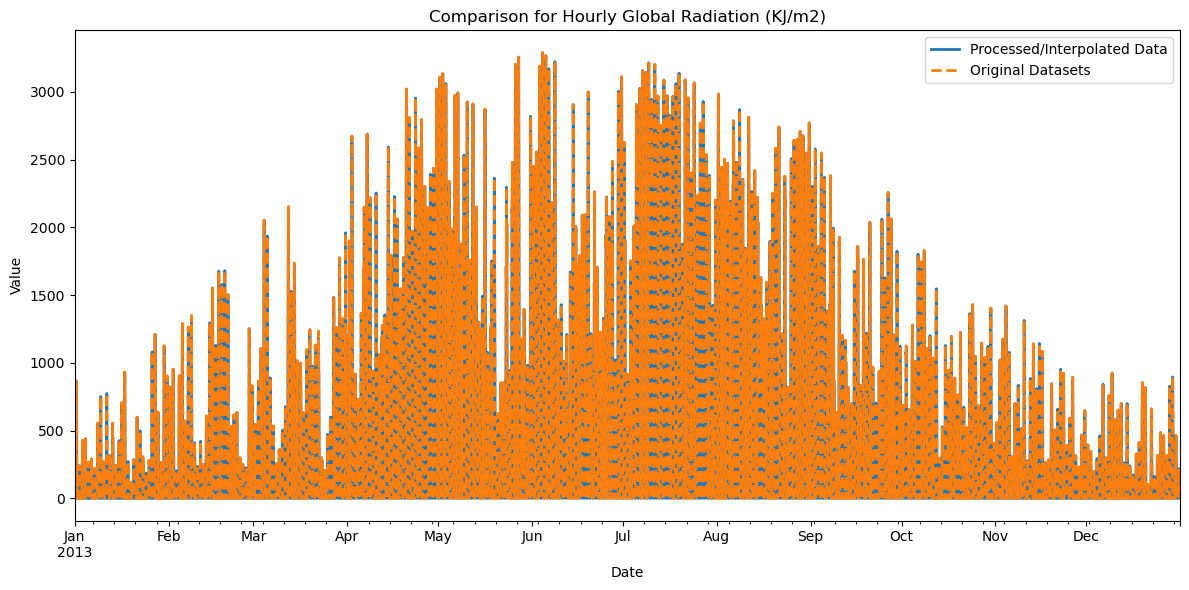

Mean of Original Datasets for Hourly Global Radiation (KJ/m2): 420.46
Mean of Processed/Interpolated Data for Hourly Global Radiation (KJ/m2): 419.20




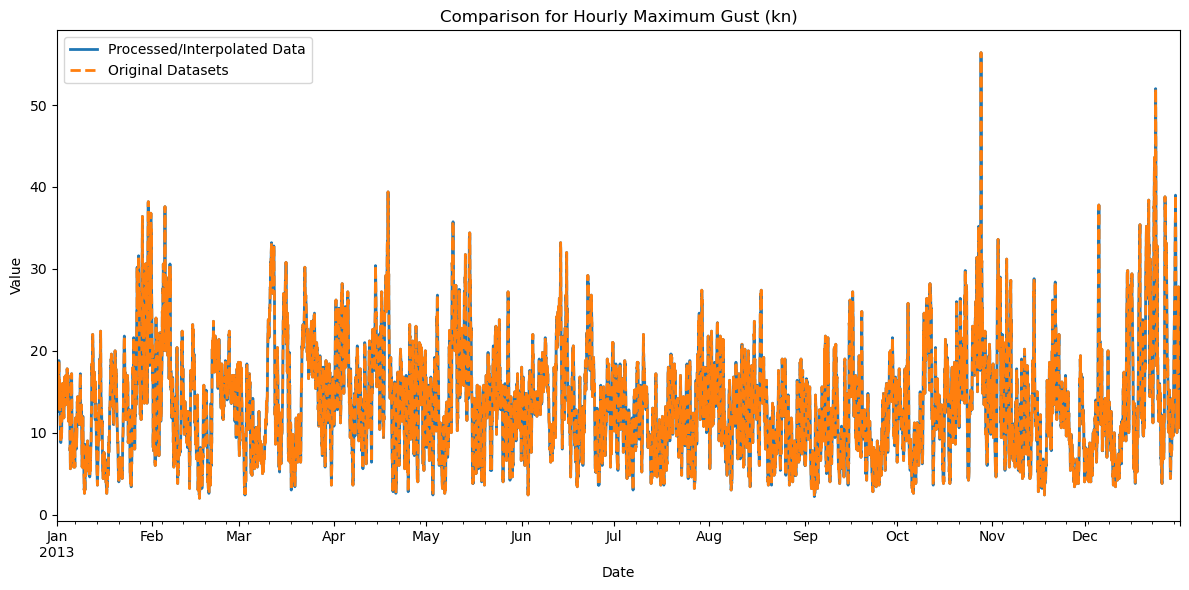

Mean of Original Datasets for Hourly Maximum Gust (kn): 13.61
Mean of Processed/Interpolated Data for Hourly Maximum Gust (kn): 13.62




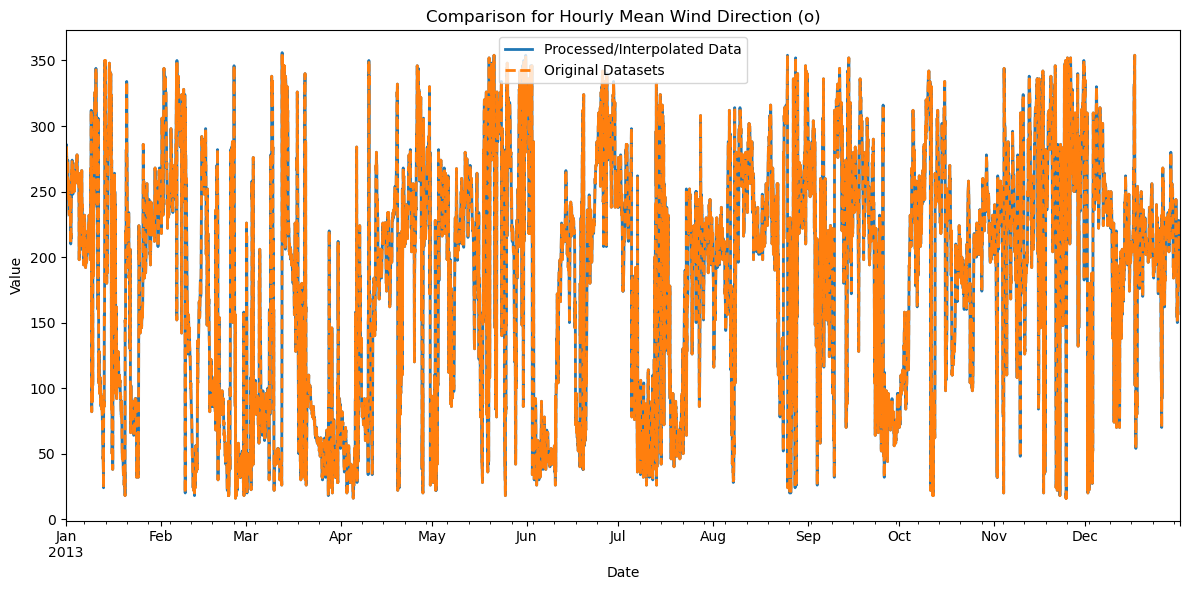

Mean of Original Datasets for Hourly Mean Wind Direction (o): 188.29
Mean of Processed/Interpolated Data for Hourly Mean Wind Direction (o): 188.44




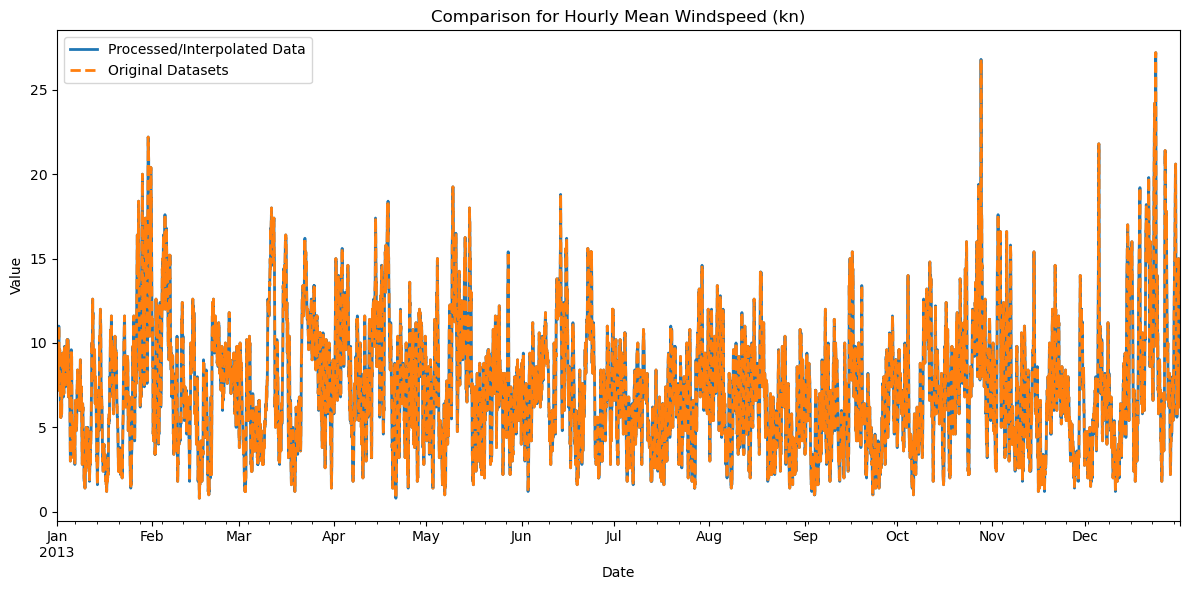

Mean of Original Datasets for Hourly Mean Windspeed (kn): 7.33
Mean of Processed/Interpolated Data for Hourly Mean Windspeed (kn): 7.34




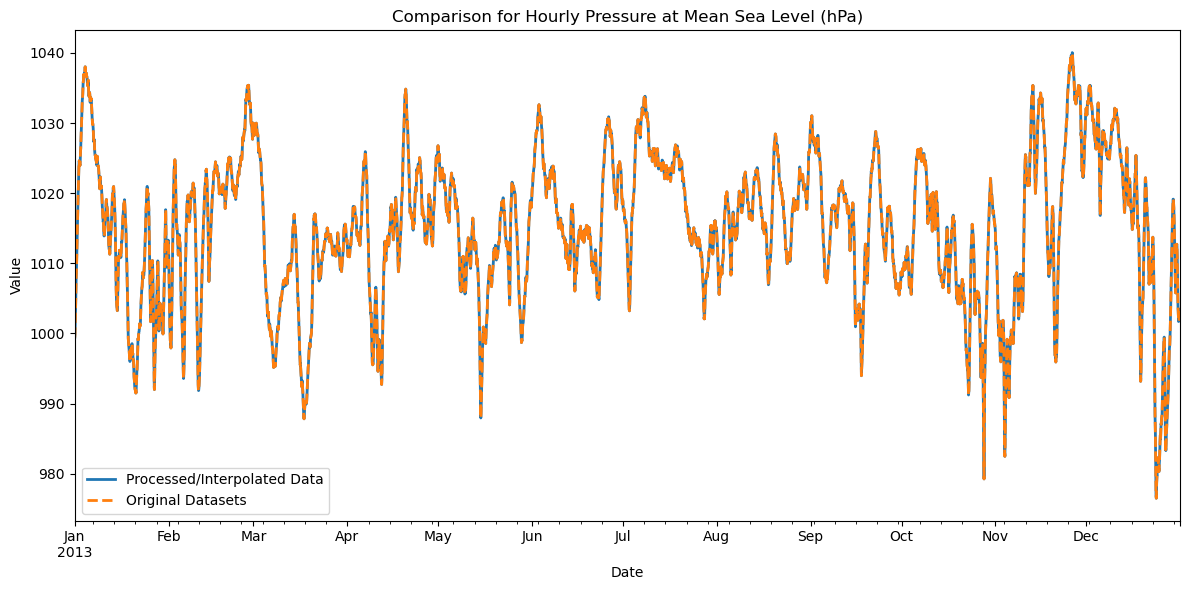

Mean of Original Datasets for Hourly Pressure at Mean Sea Level (hPa): 1015.21
Mean of Processed/Interpolated Data for Hourly Pressure at Mean Sea Level (hPa): 1015.19




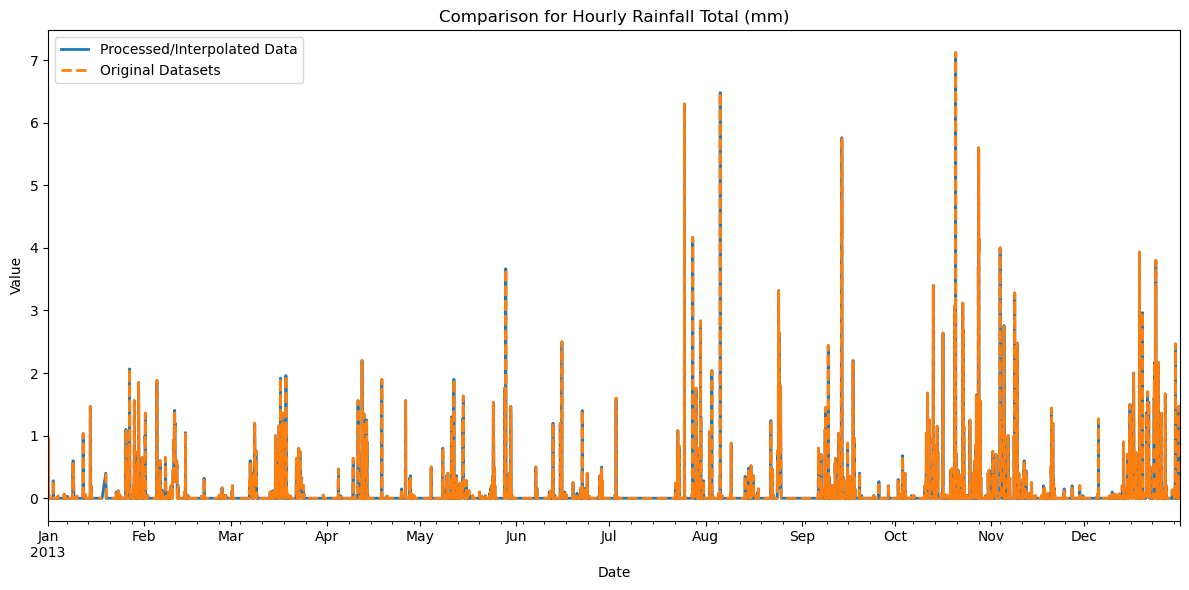

Mean of Original Datasets for Hourly Rainfall Total (mm): 0.08
Mean of Processed/Interpolated Data for Hourly Rainfall Total (mm): 0.08




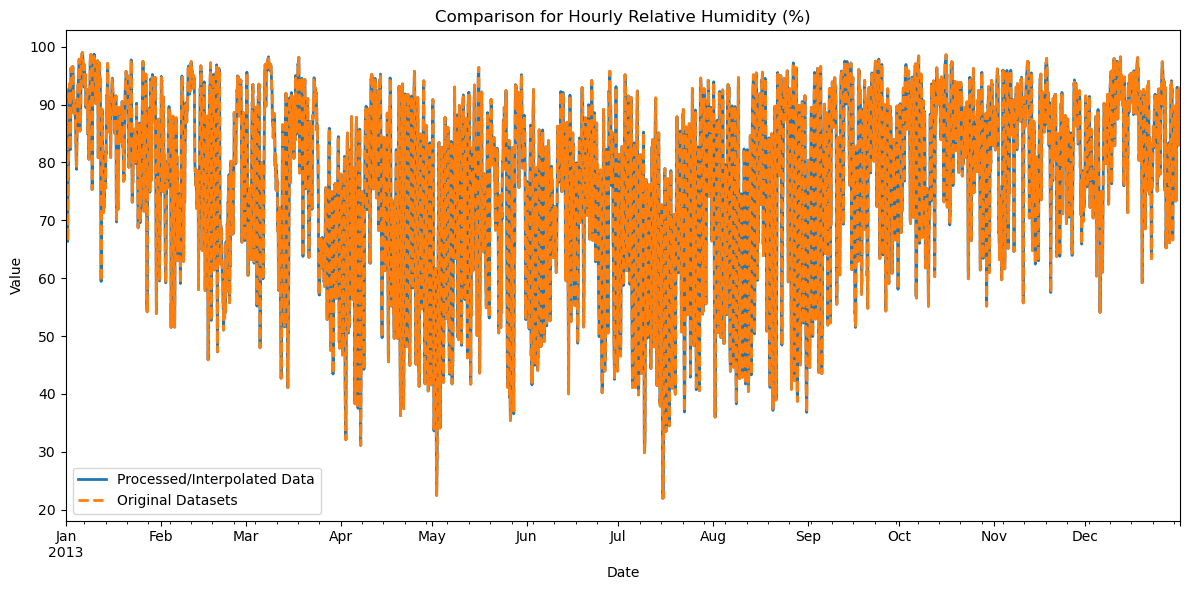

Mean of Original Datasets for Hourly Relative Humidity (%): 76.84
Mean of Processed/Interpolated Data for Hourly Relative Humidity (%): 76.96




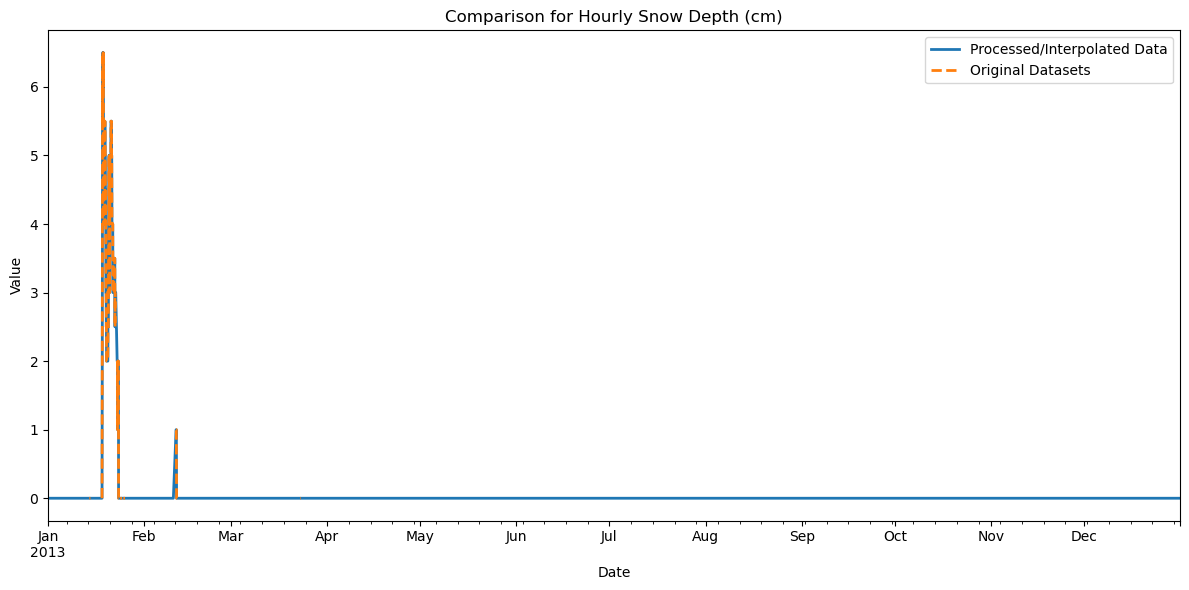

Mean of Original Datasets for Hourly Snow Depth (cm): 0.70
Mean of Processed/Interpolated Data for Hourly Snow Depth (cm): 0.05




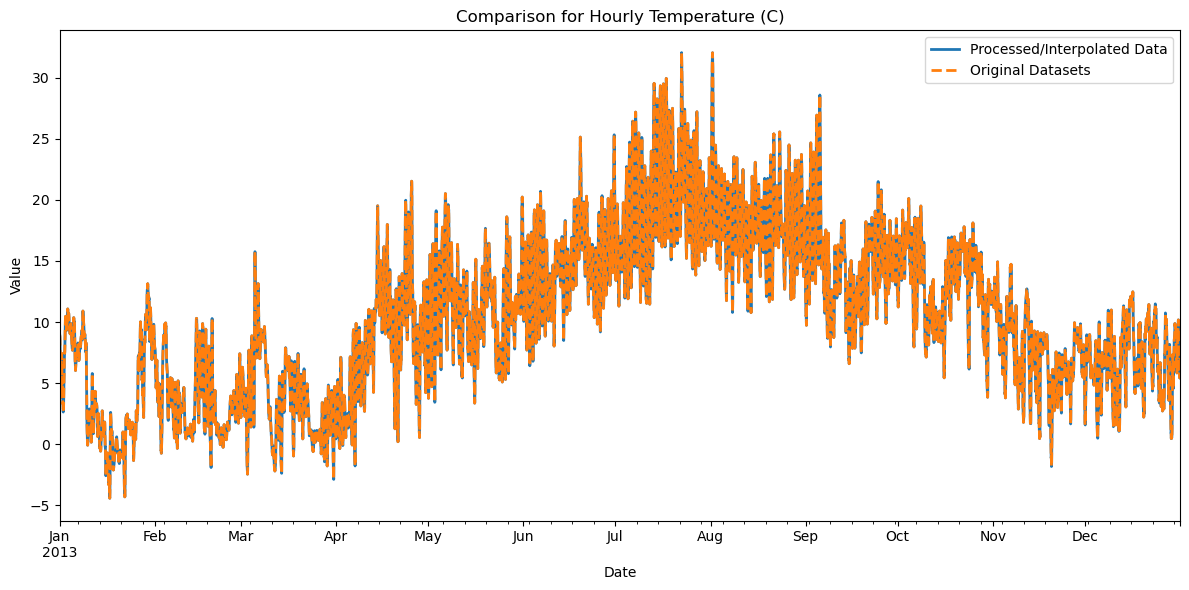

Mean of Original Datasets for Hourly Temperature (C): 10.31
Mean of Processed/Interpolated Data for Hourly Temperature (C): 10.42




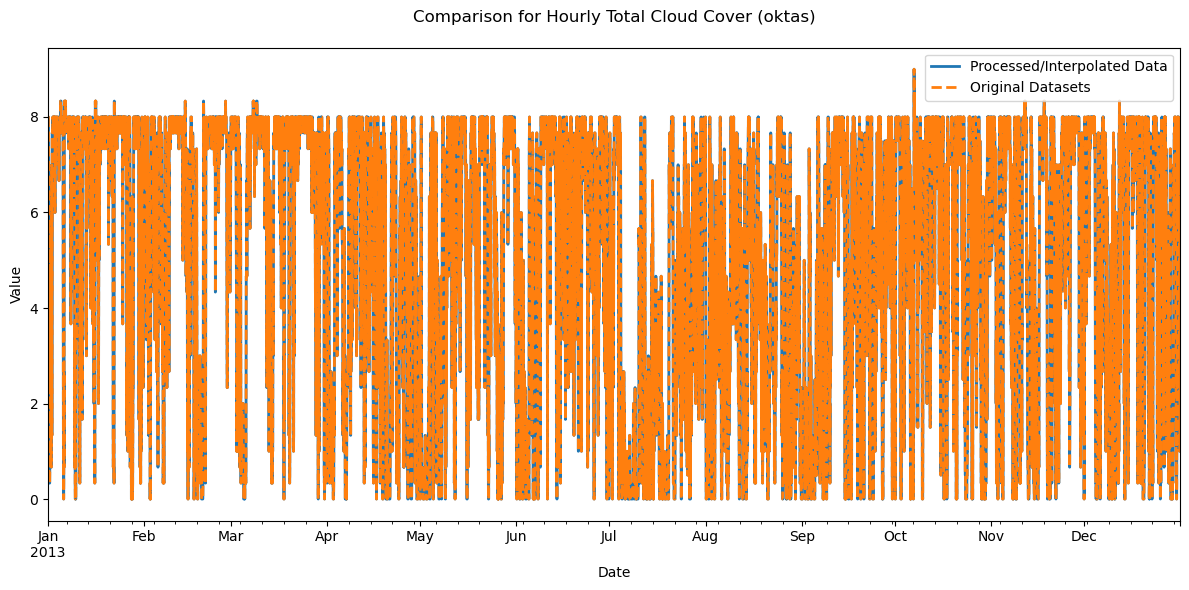

Mean of Original Datasets for Hourly Total Cloud Cover (oktas)
: 5.07
Mean of Processed/Interpolated Data for Hourly Total Cloud Cover (oktas)
: 5.10




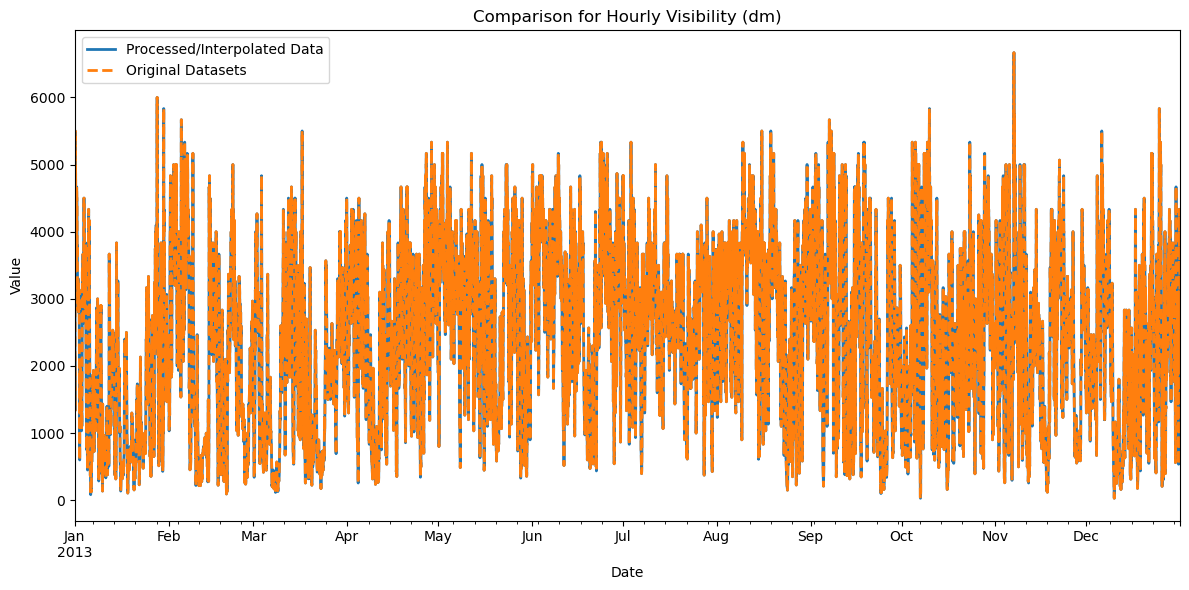

Mean of Original Datasets for Hourly Visibility (dm): 2420.08
Mean of Processed/Interpolated Data for Hourly Visibility (dm): 2421.36




In [33]:
#Visualising final weather dataframe before and after filling in missing values fo each weather variable

datasets_list = [heathrow, gravesend, kenley, northolt, stjamespark, kewgardens, hampstead]

for df in datasets_list:
    df.replace(['-', 'Trace'], np.nan, inplace=True)
    df[df.columns] = df[df.columns].astype(float) 

average_original = pd.concat(datasets_list, axis=1)
average_original.columns = pd.MultiIndex.from_product([['heathrow', 'gravesend', 'kenley', 'northolt', 'stjamespark', 'kewgardens', 'hampstead'], heathrow.columns])
average_original_mean = average_original.groupby(level=1, axis=1).mean()

for col in final_weather.columns:
    plt.figure(figsize=(12, 6))
    
    final_weather[col].plot(label='Processed/Interpolated Data', linewidth=2)
    
    if col in average_original_mean.columns:
        average_original_mean[col].plot(label='Original Datasets', linestyle='--', linewidth=2)
    
    plt.title(f'Comparison for {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    individual_means = [df[col].mean() for df in datasets_list if col in df.columns]
    original_mean = np.nanmean(individual_means) 
    interpolated_mean = final_weather[col].mean()
    
    print(f"Mean of Original Datasets for {col}: {original_mean:.2f}")
    print(f"Mean of Processed/Interpolated Data for {col}: {interpolated_mean:.2f}")
    print("\n")

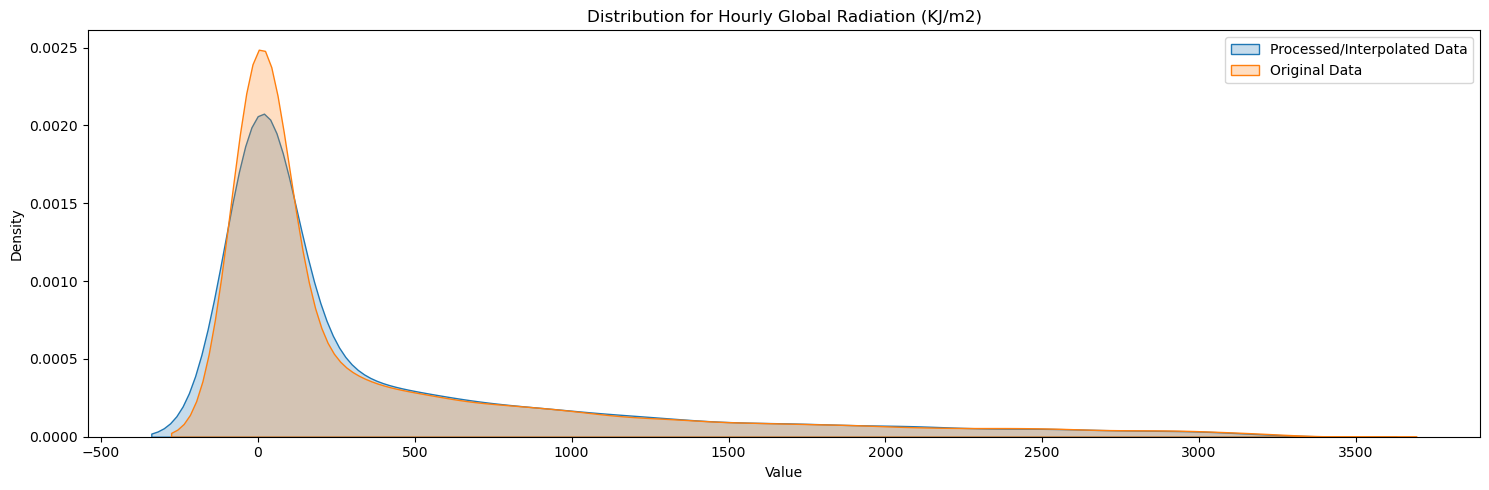

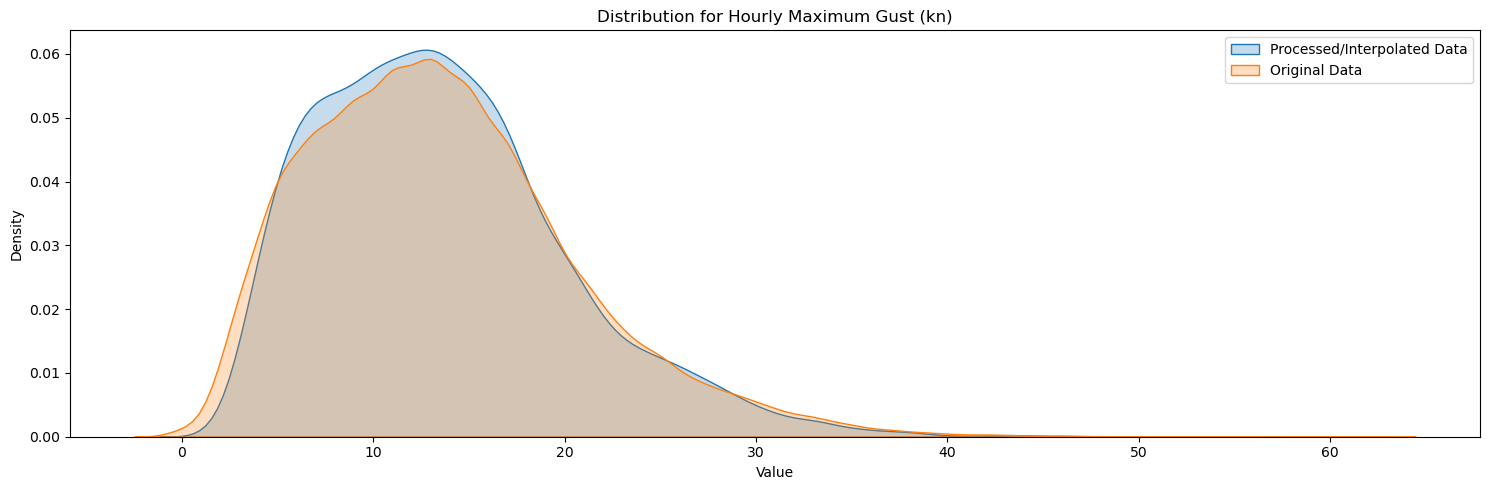

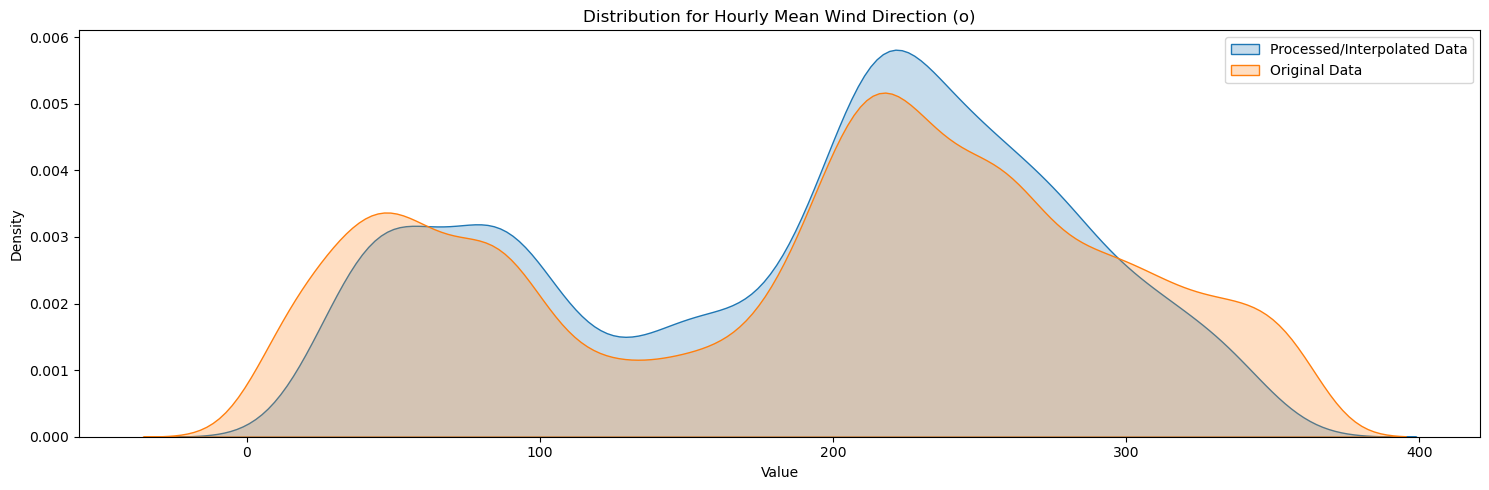

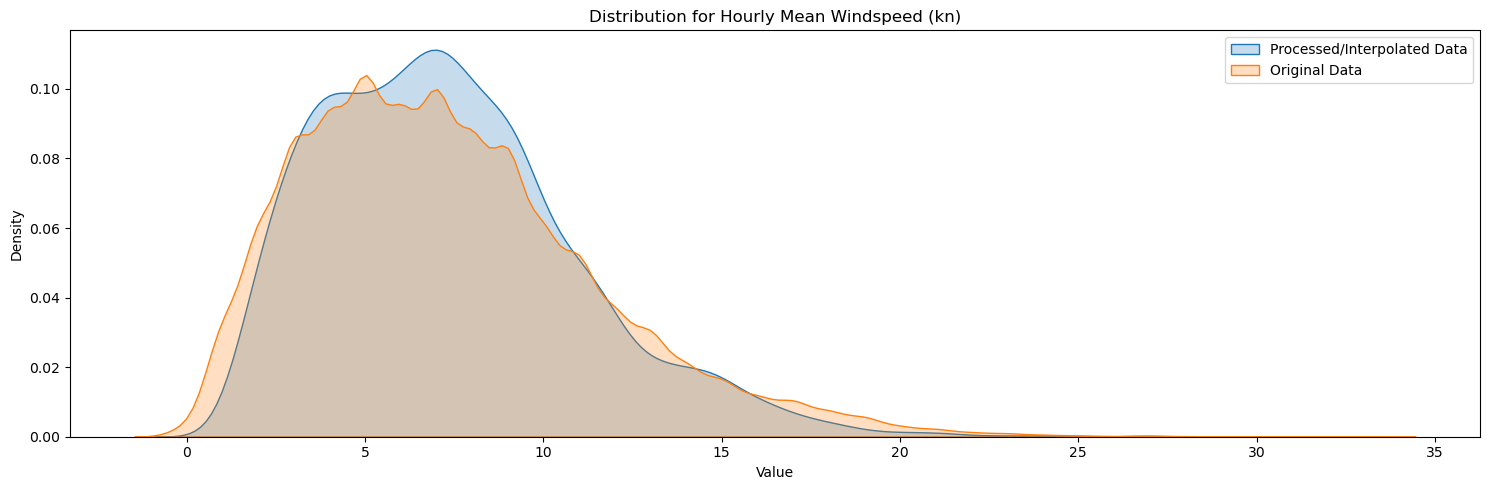

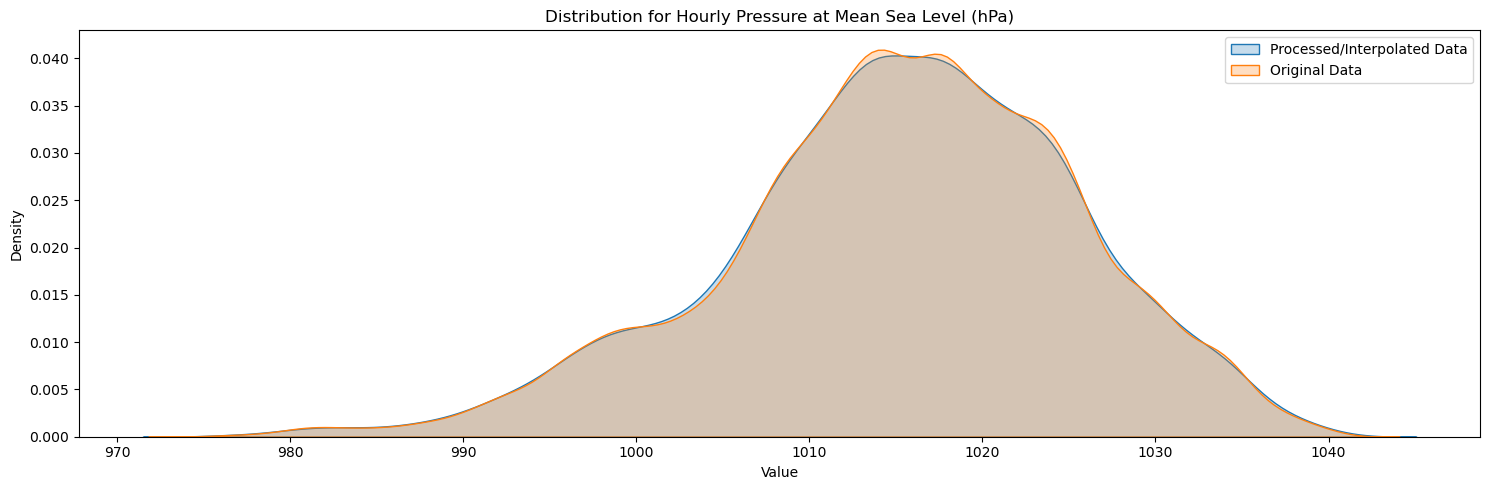

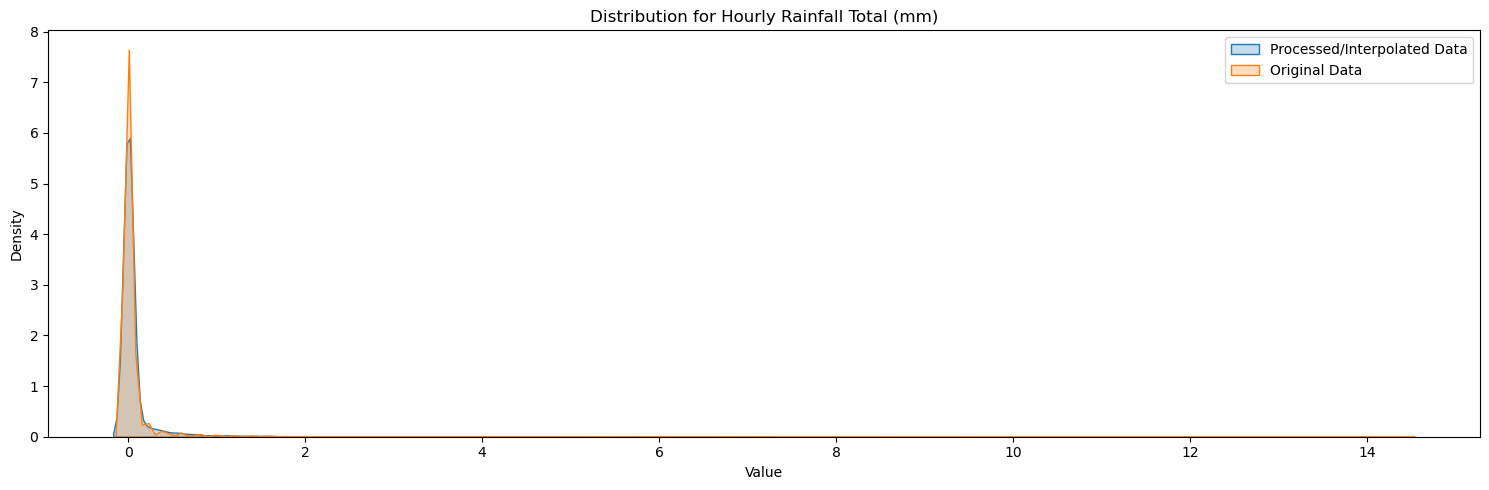

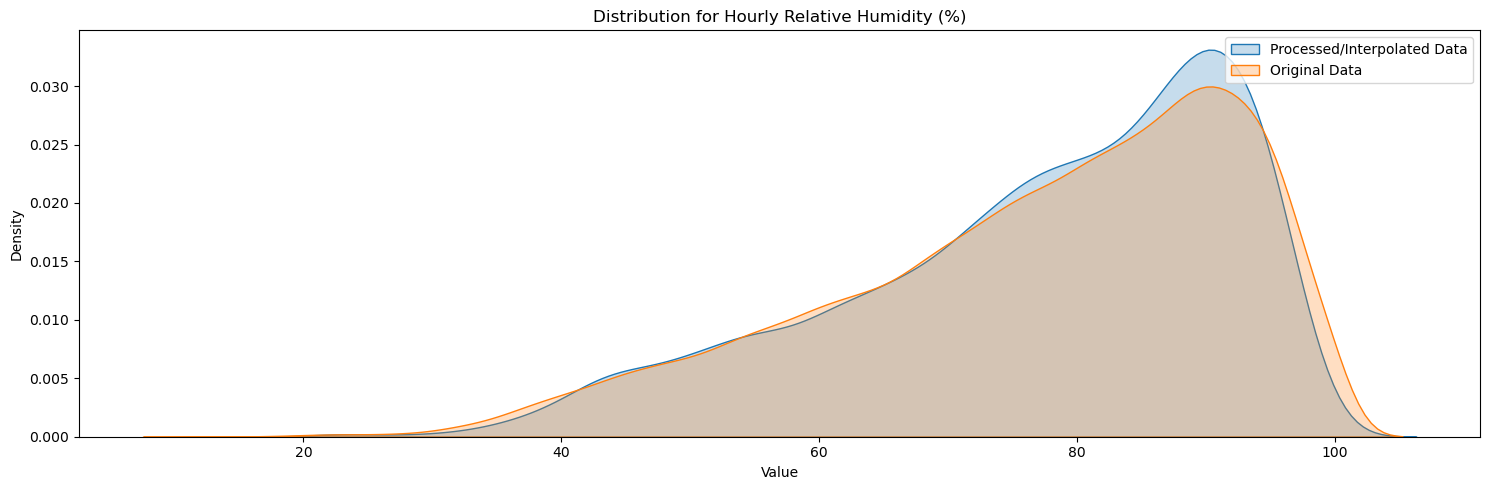

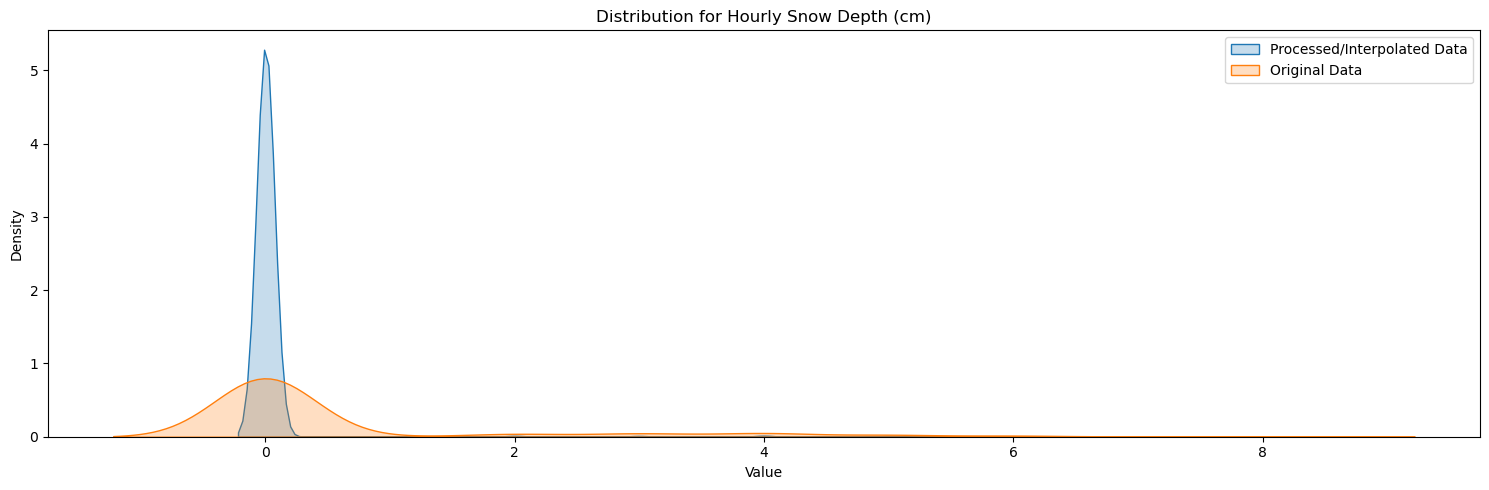

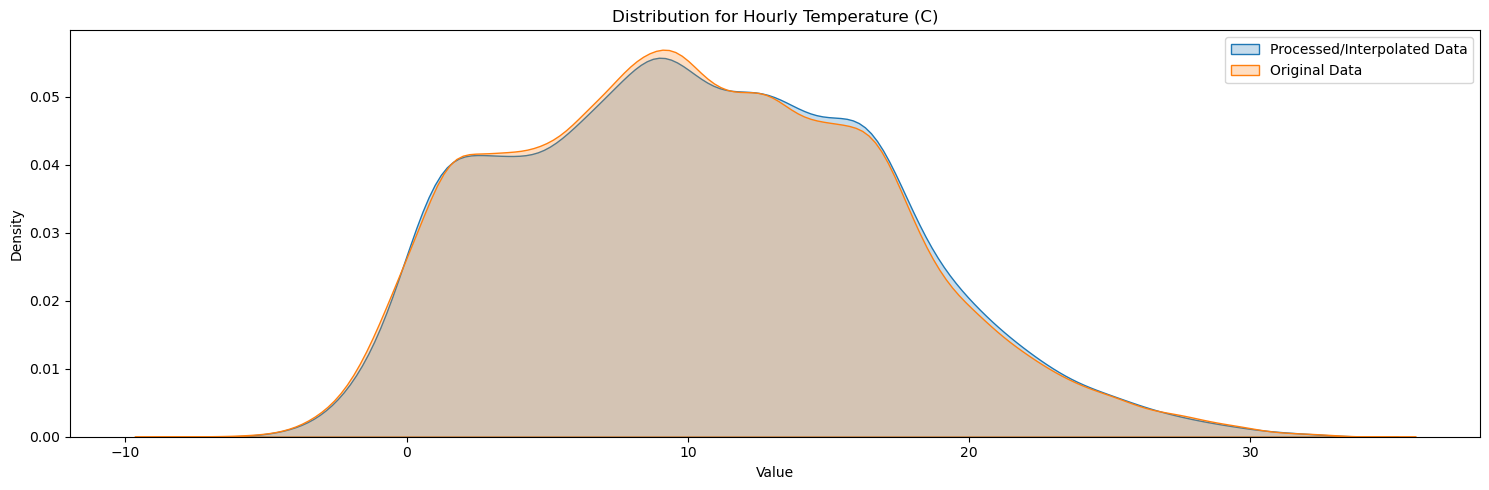

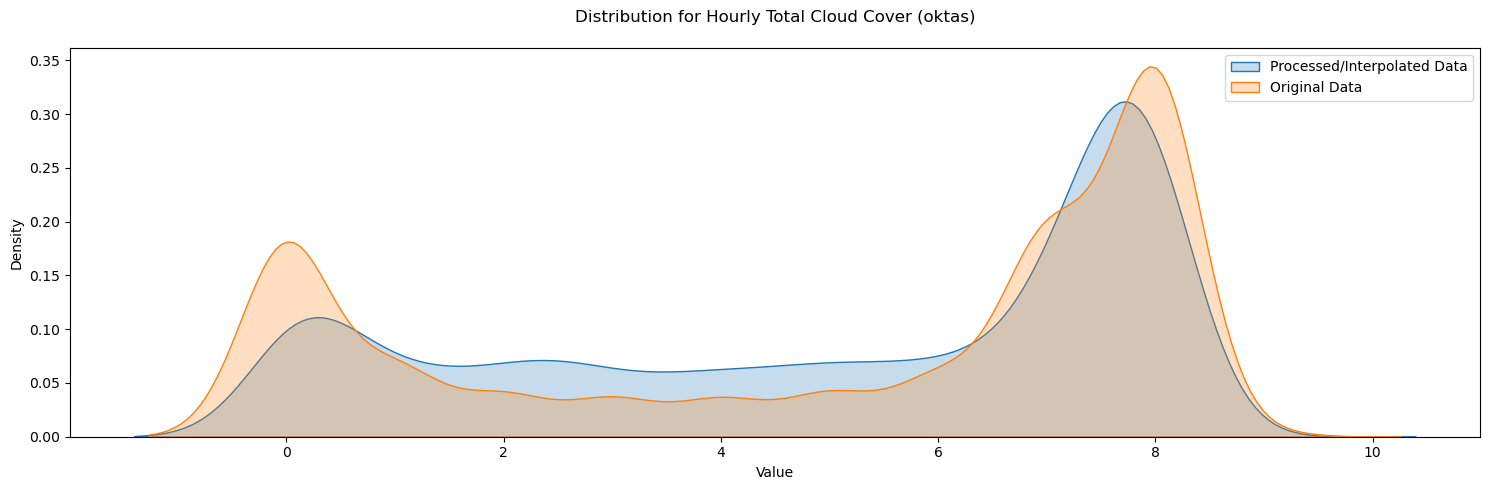

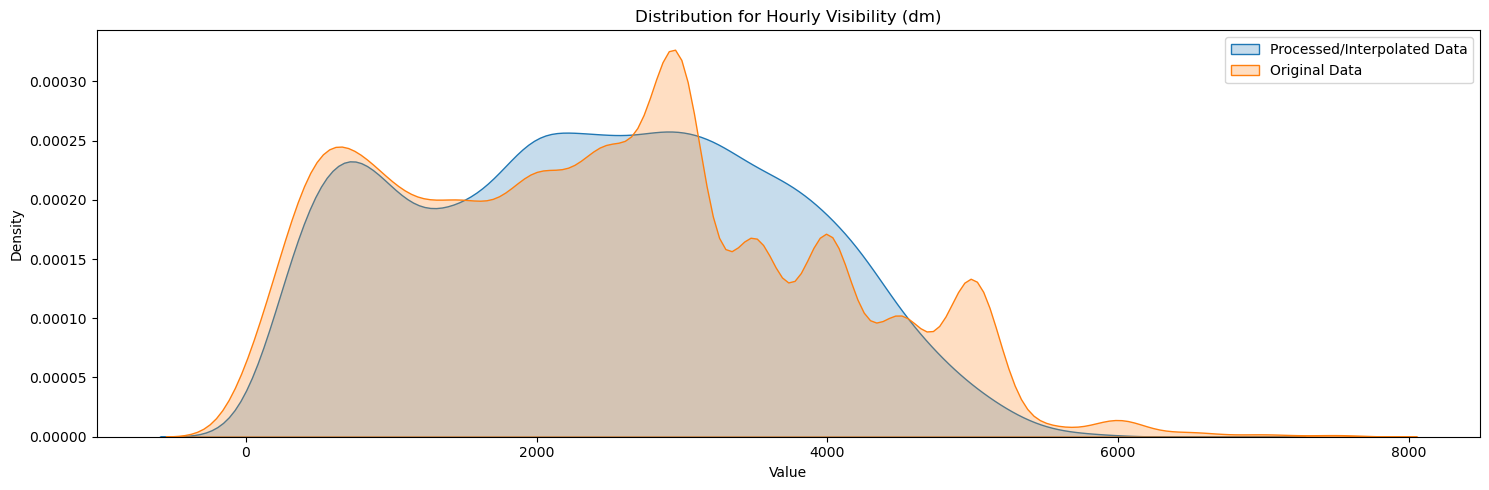

In [34]:
#Plotting the distribution of each weather variable for the original and processed/interpolated data

for col in final_weather.columns:
    
    plt.figure(figsize=(15, 5))
    
    sns.kdeplot(final_weather[col], label='Processed/Interpolated Data', fill=True)

    all_original_data = pd.concat([df[col] for df in datasets_list if col in df.columns])
    
    sns.kdeplot(all_original_data, label='Original Data', fill=True)
    
    plt.title(f'Distribution for {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

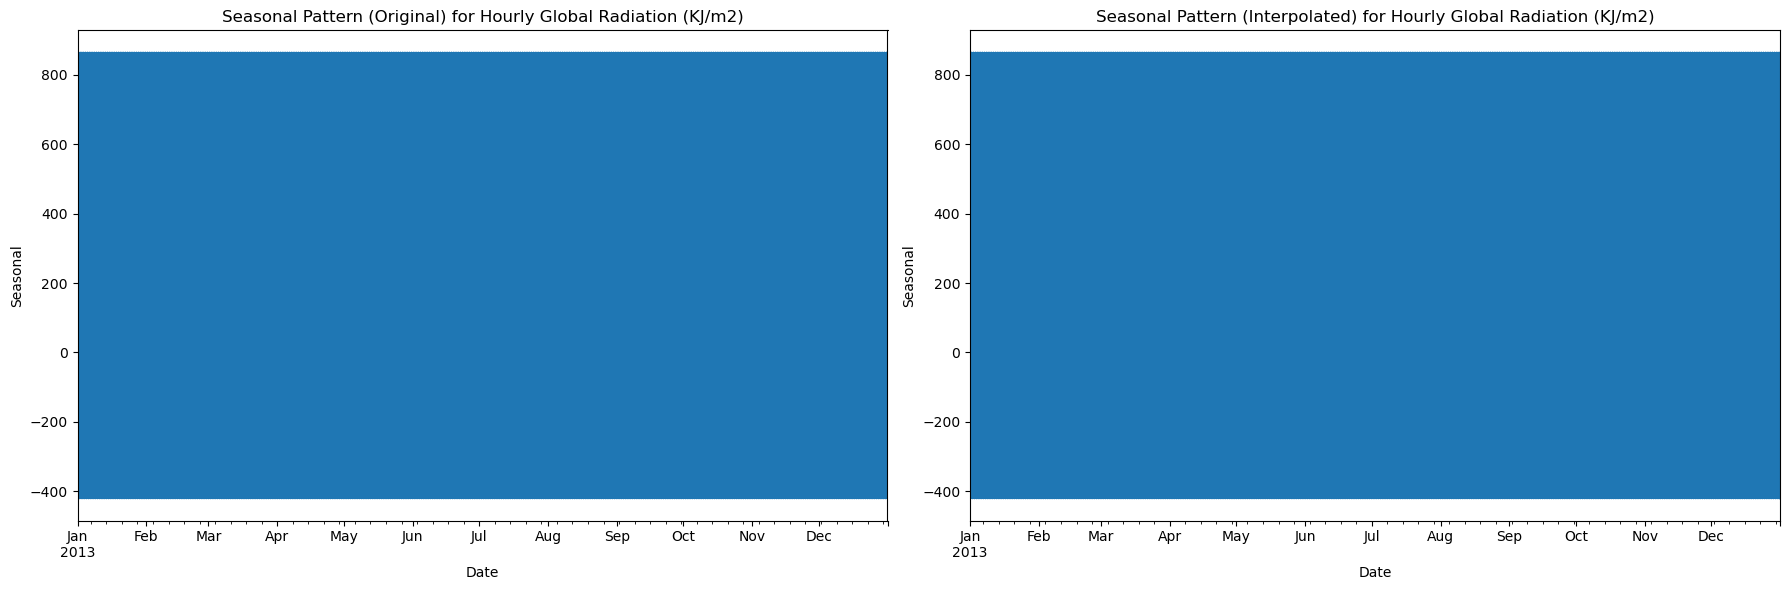

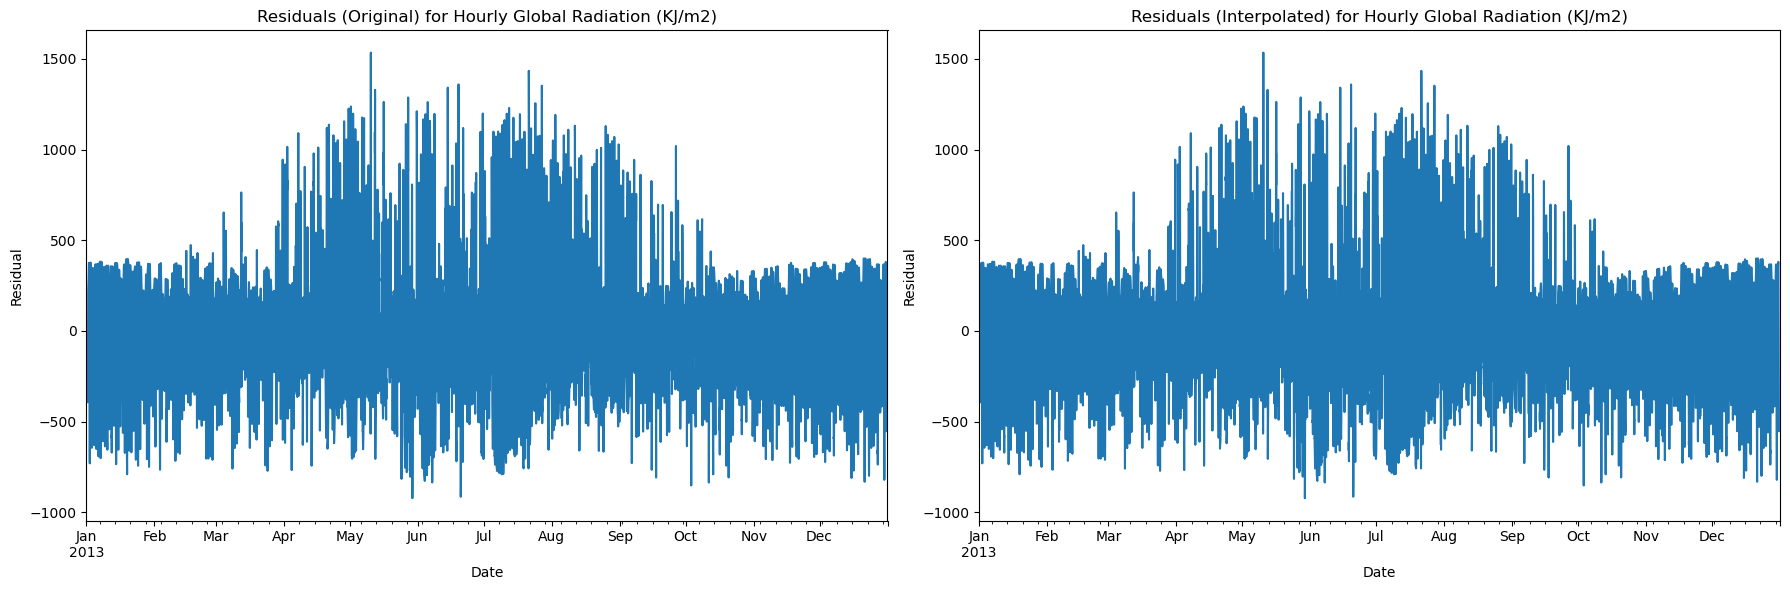

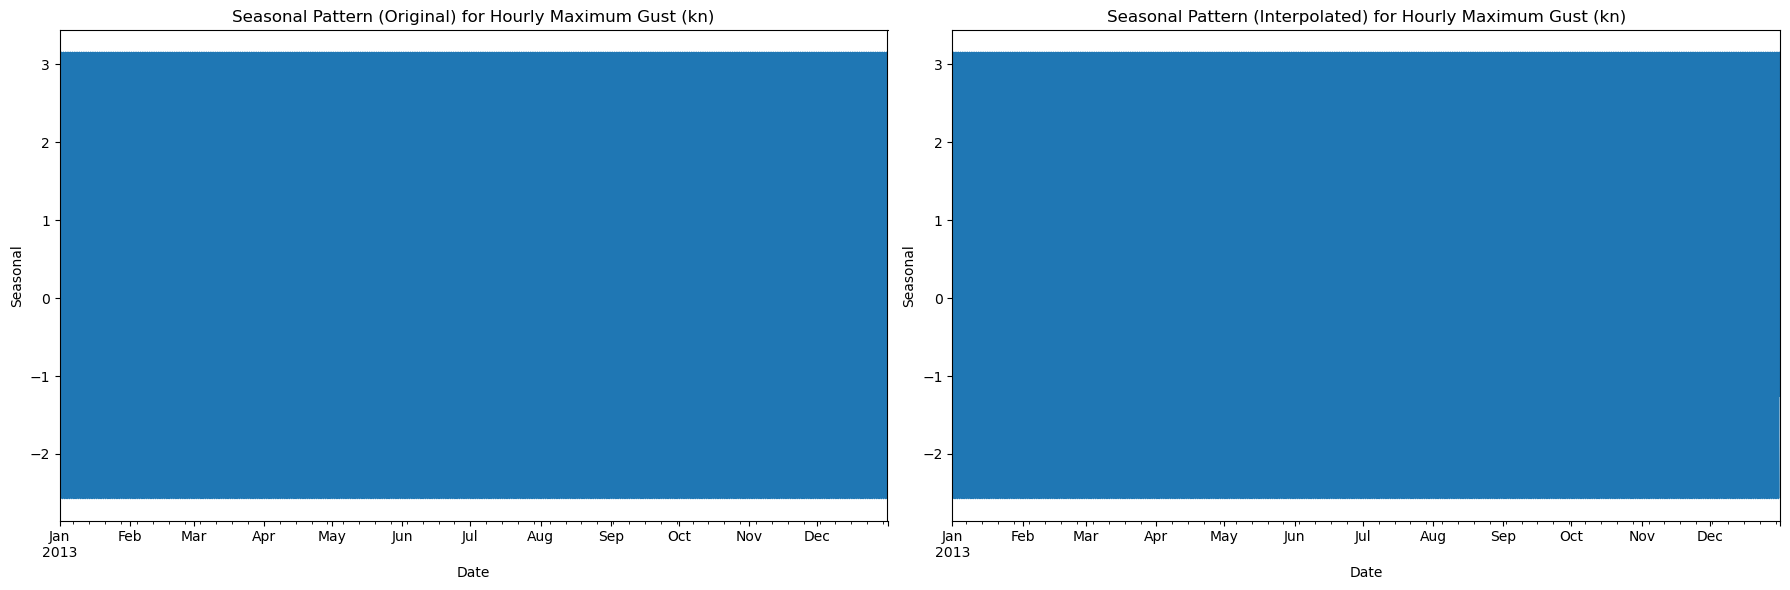

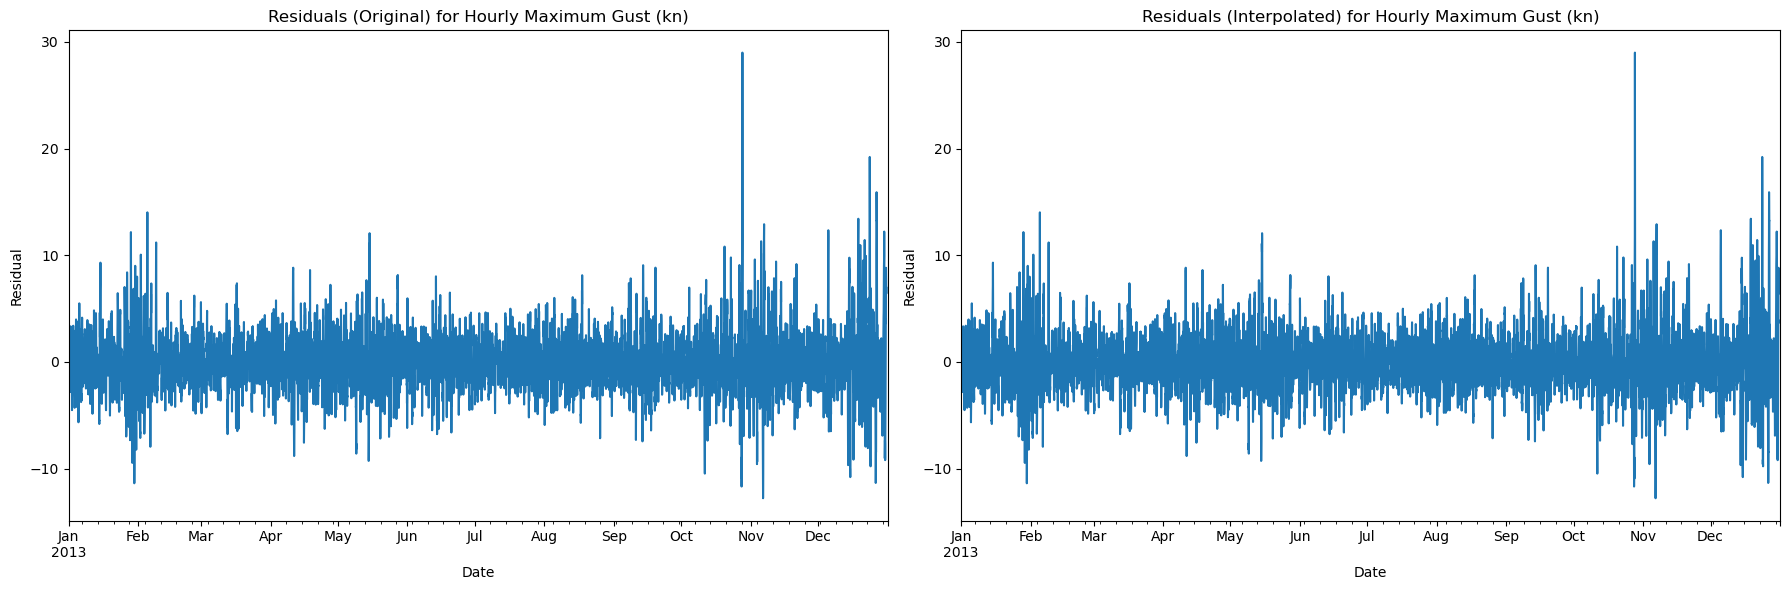

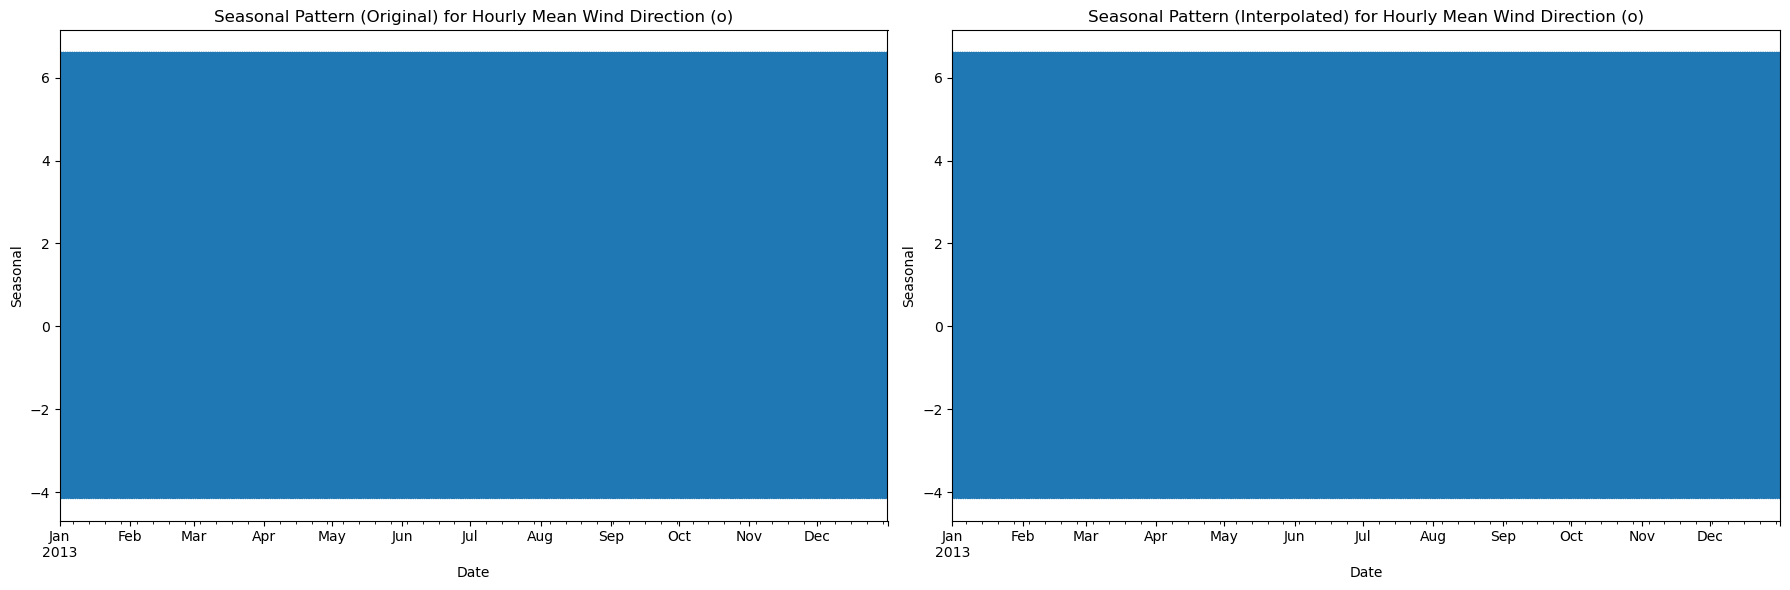

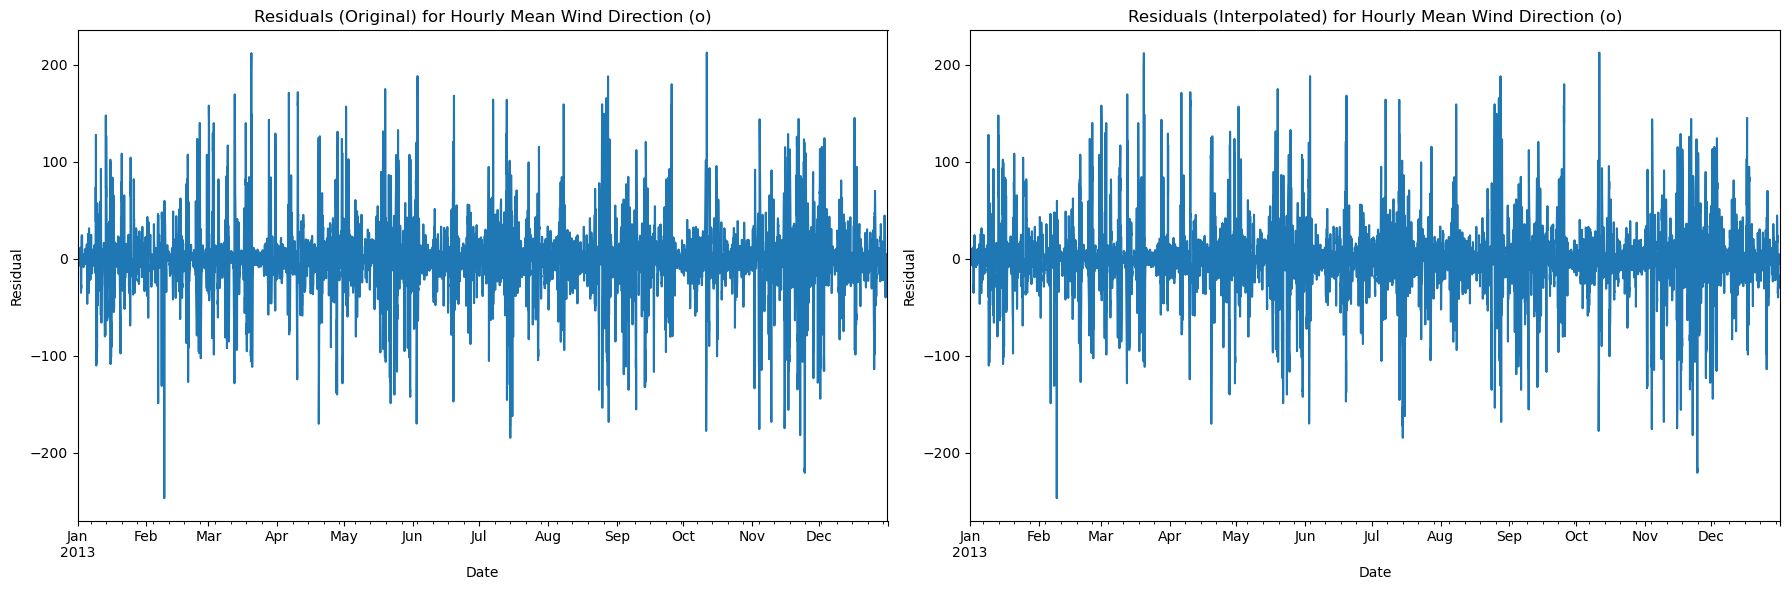

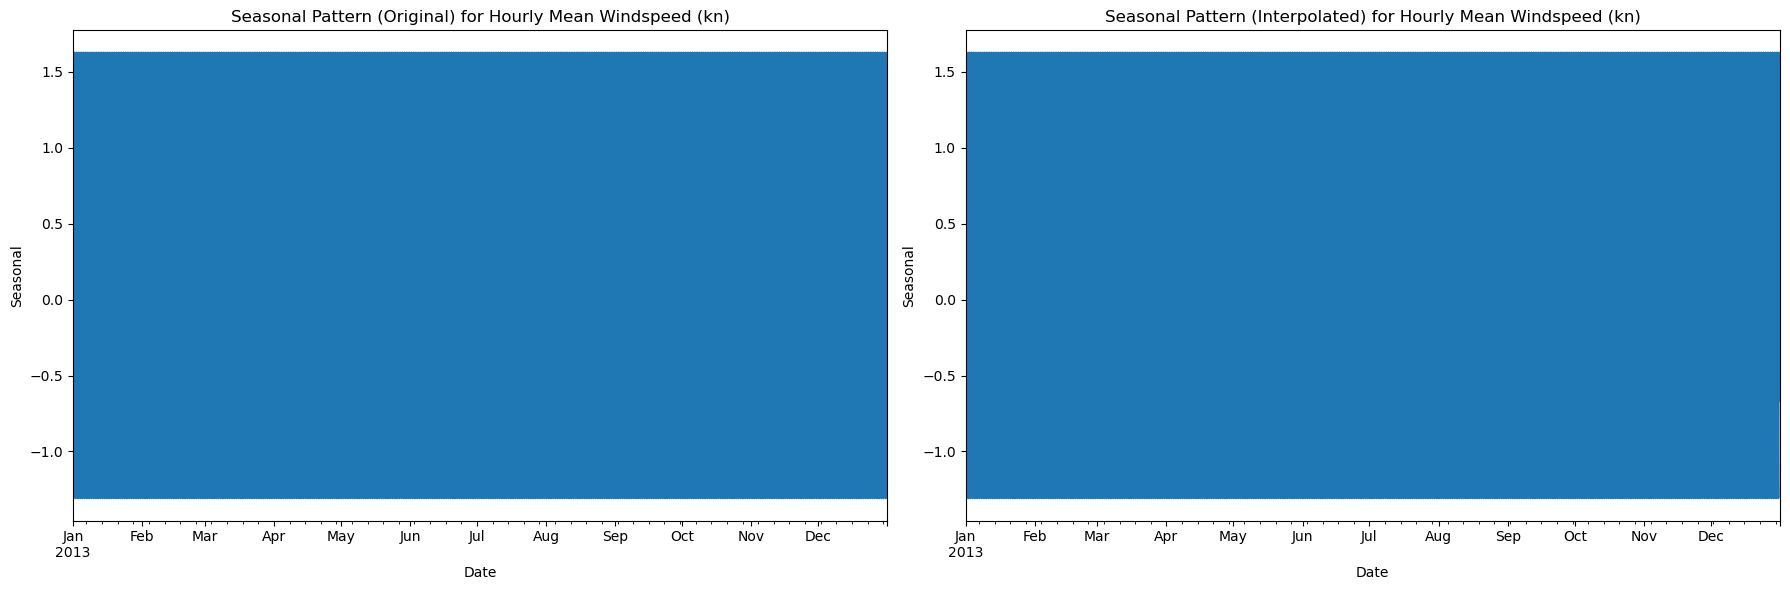

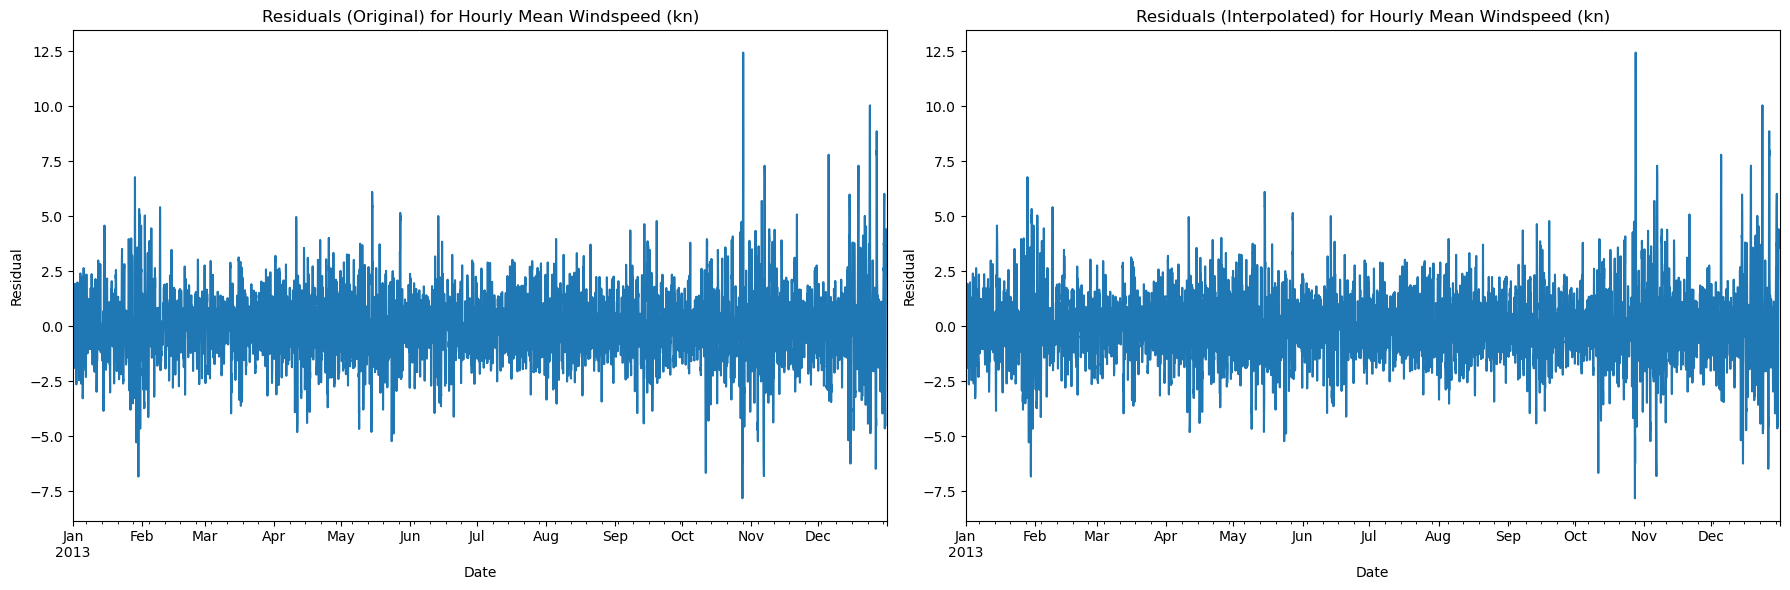

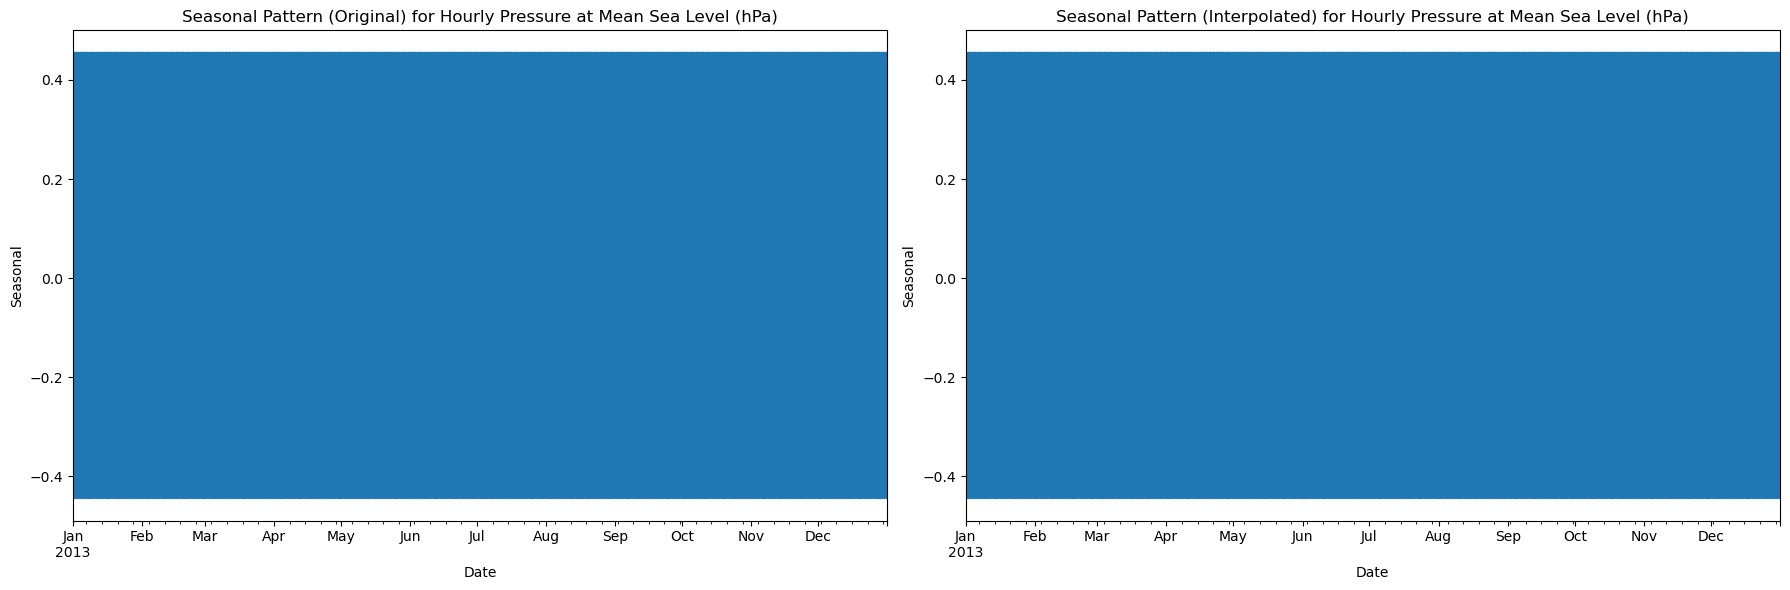

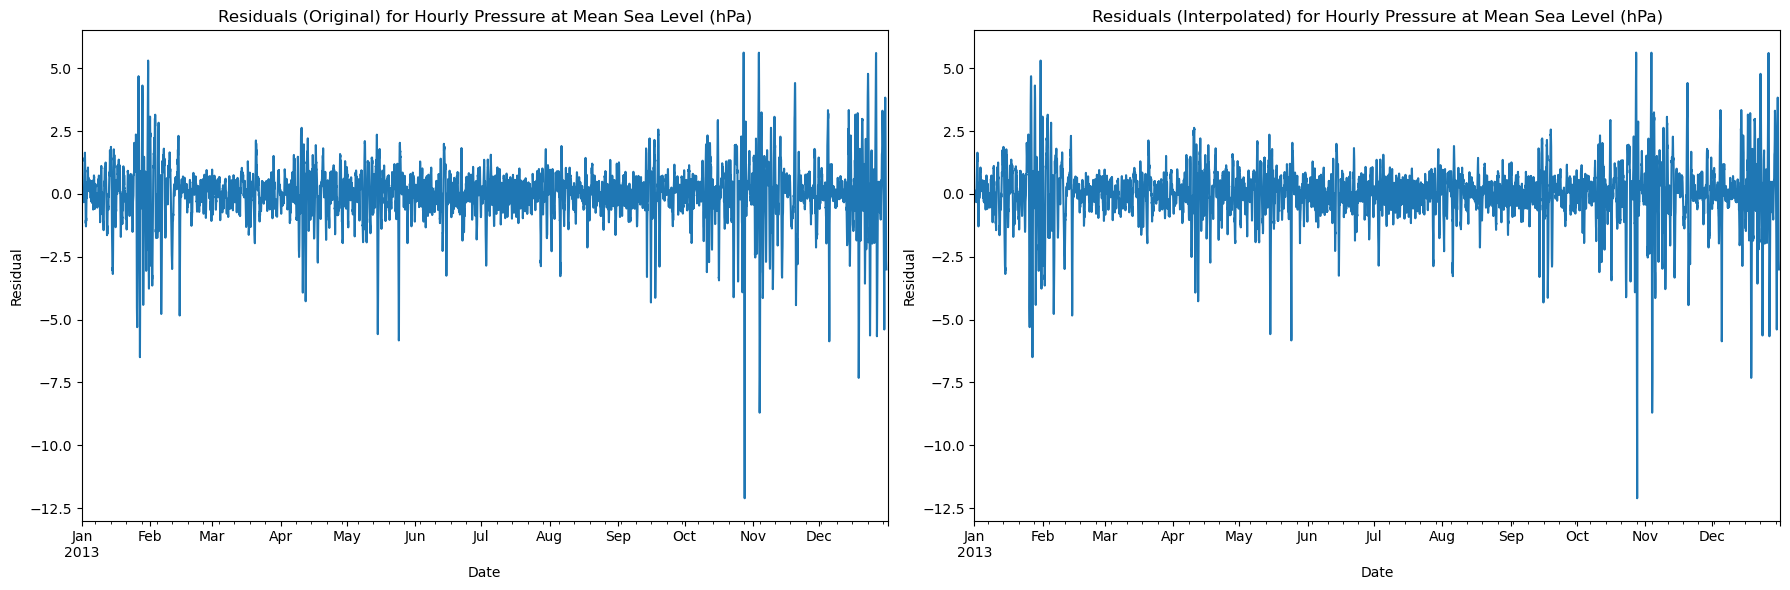

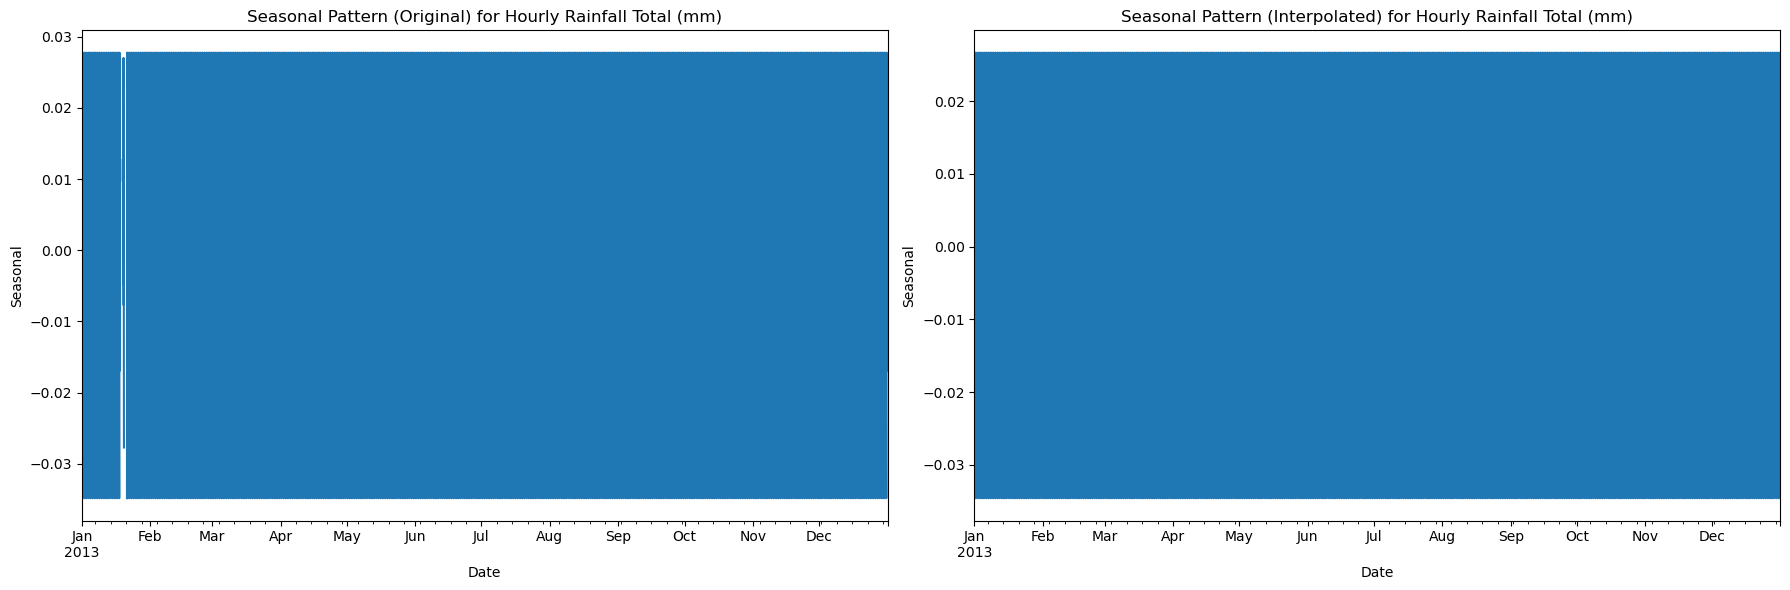

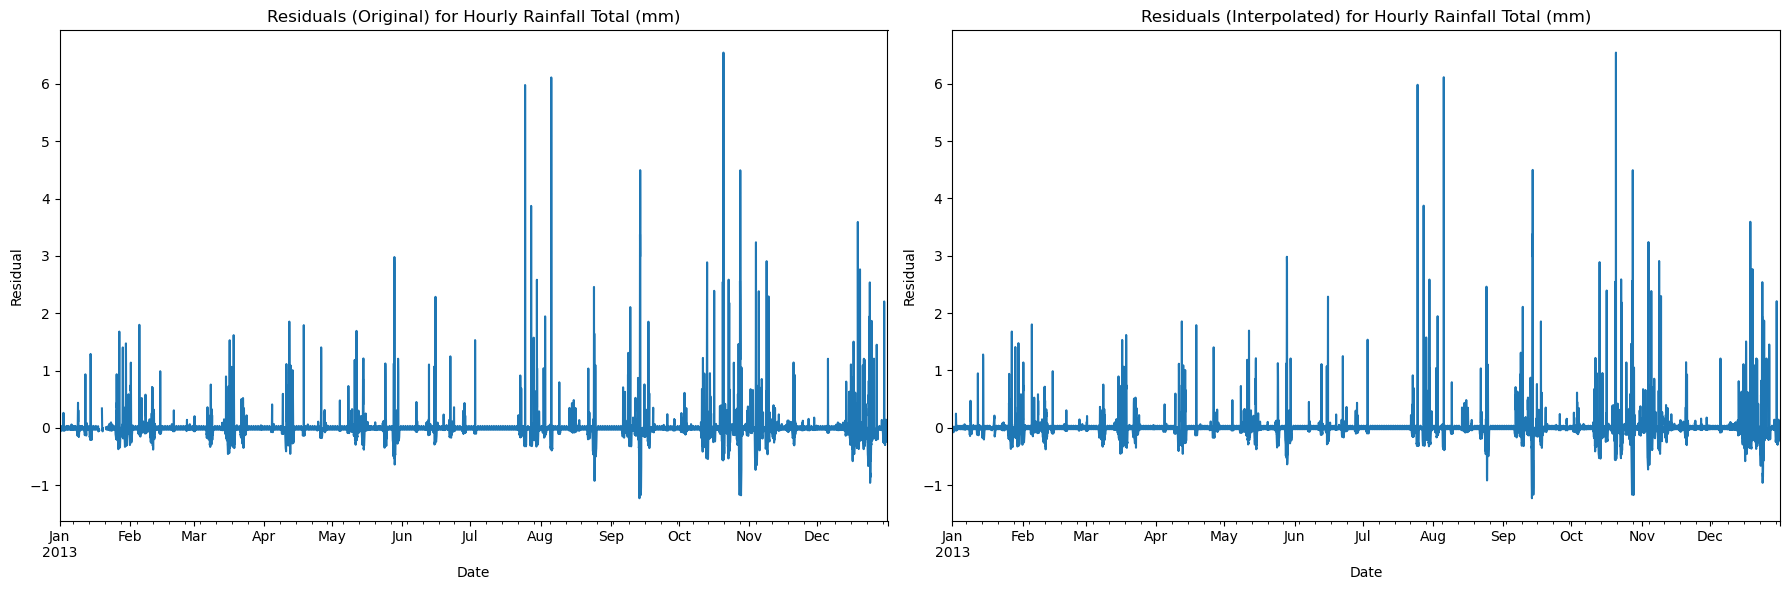

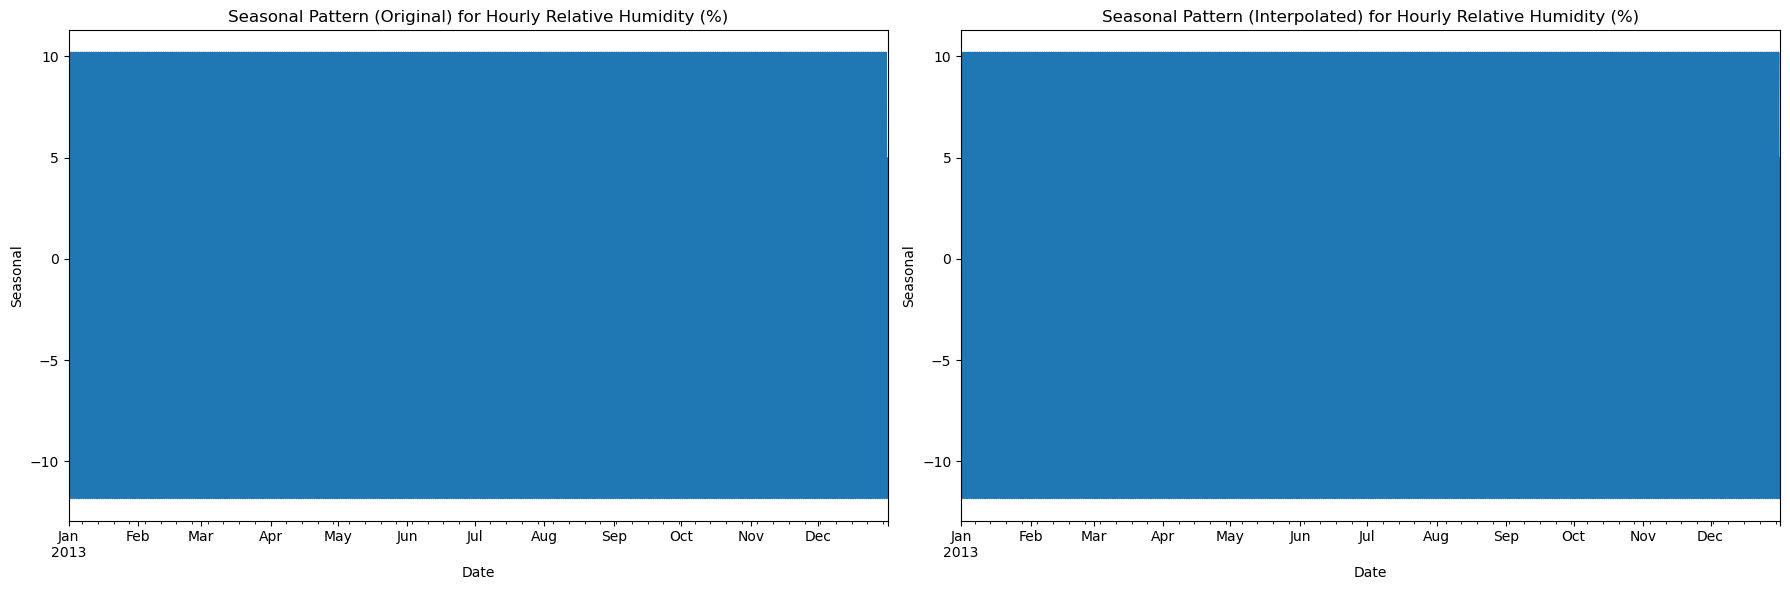

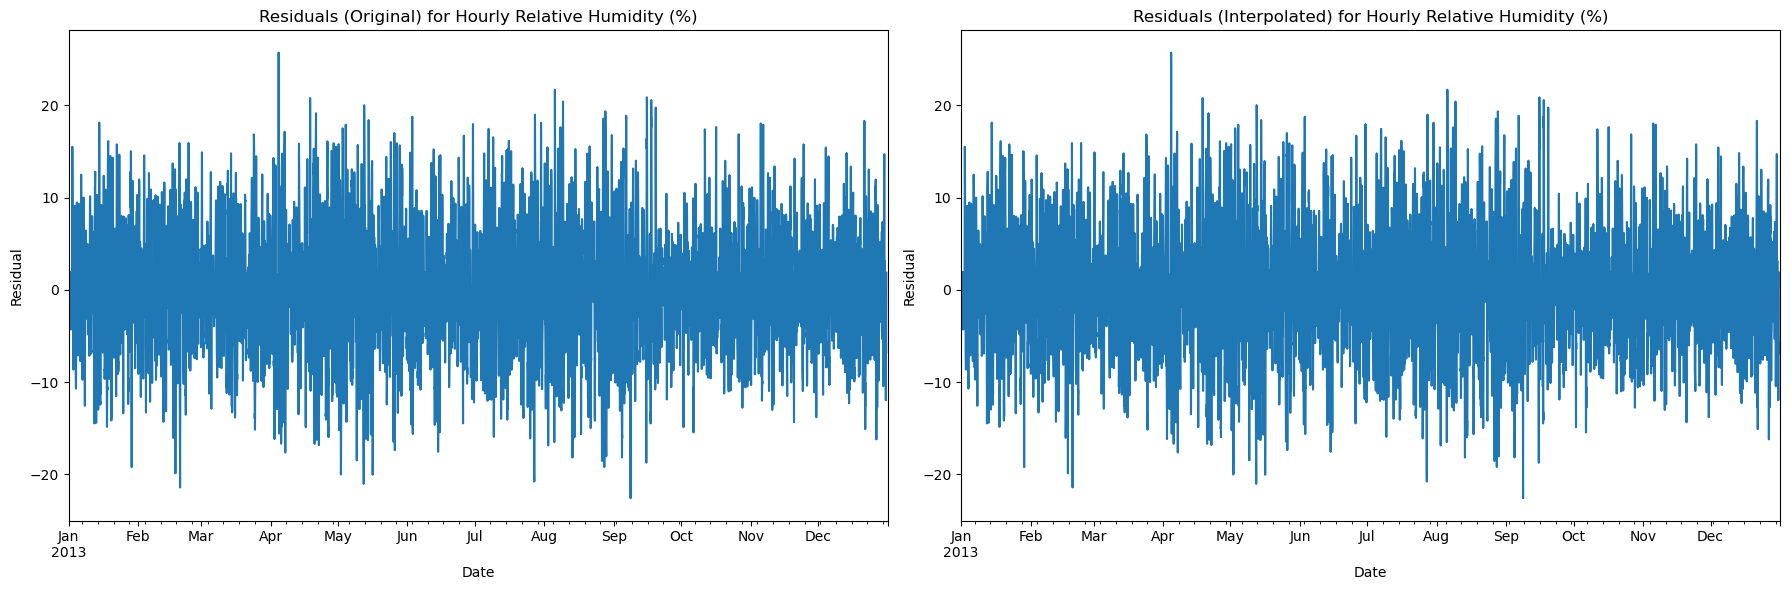

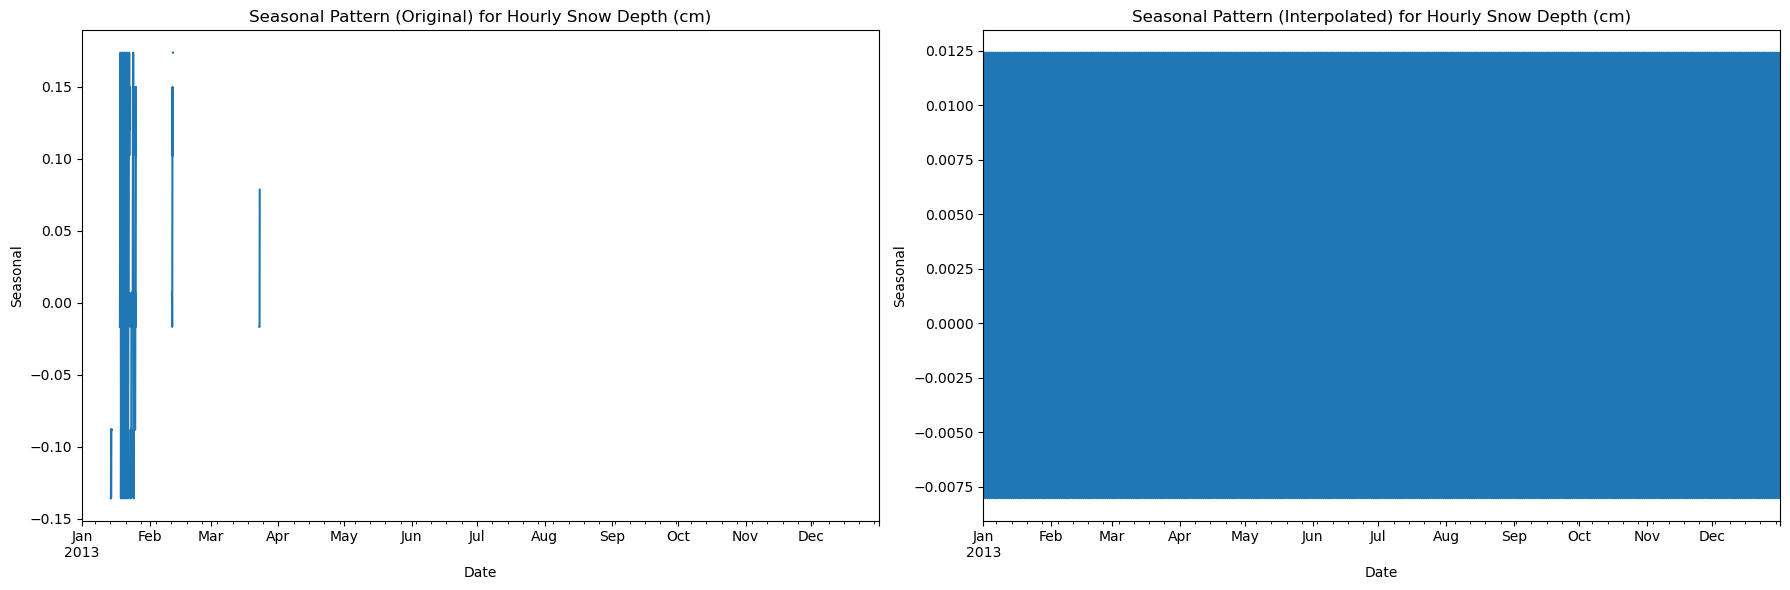

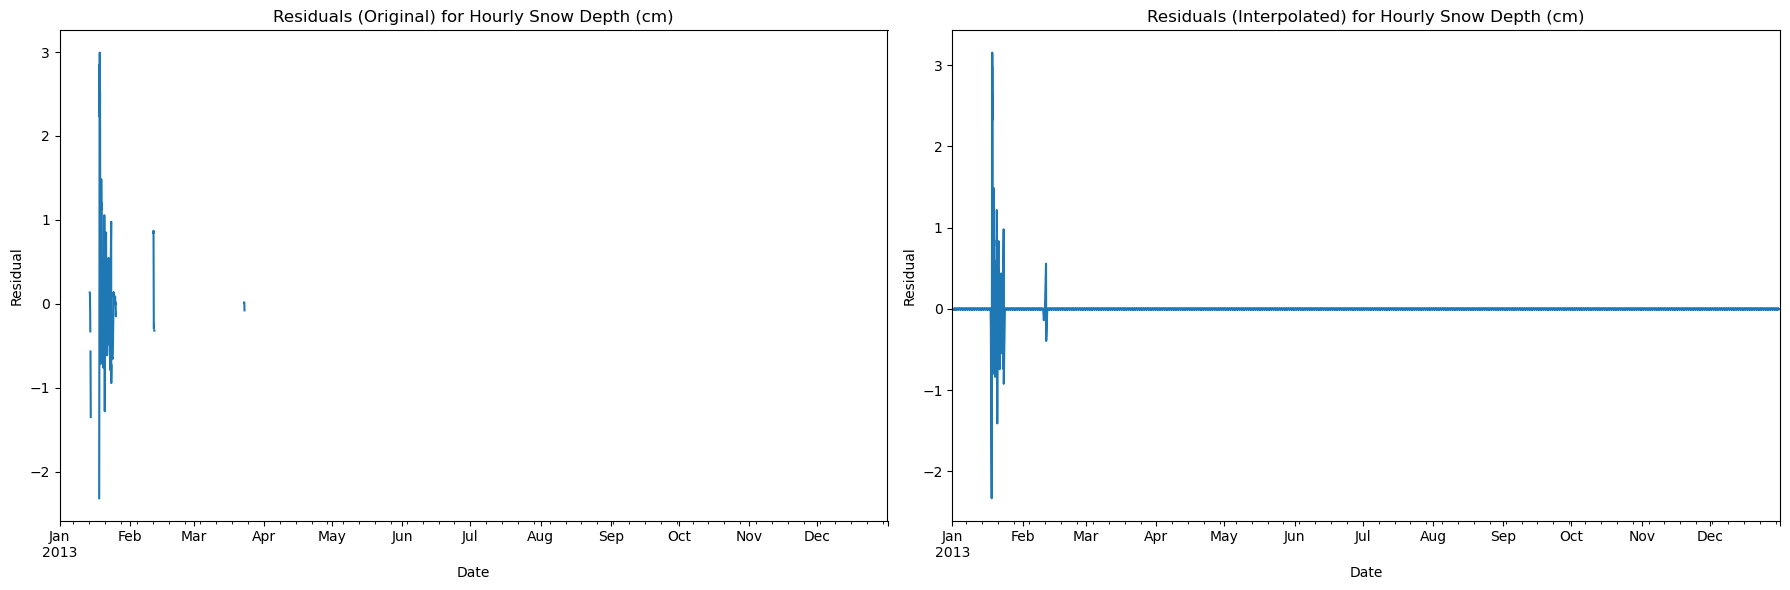

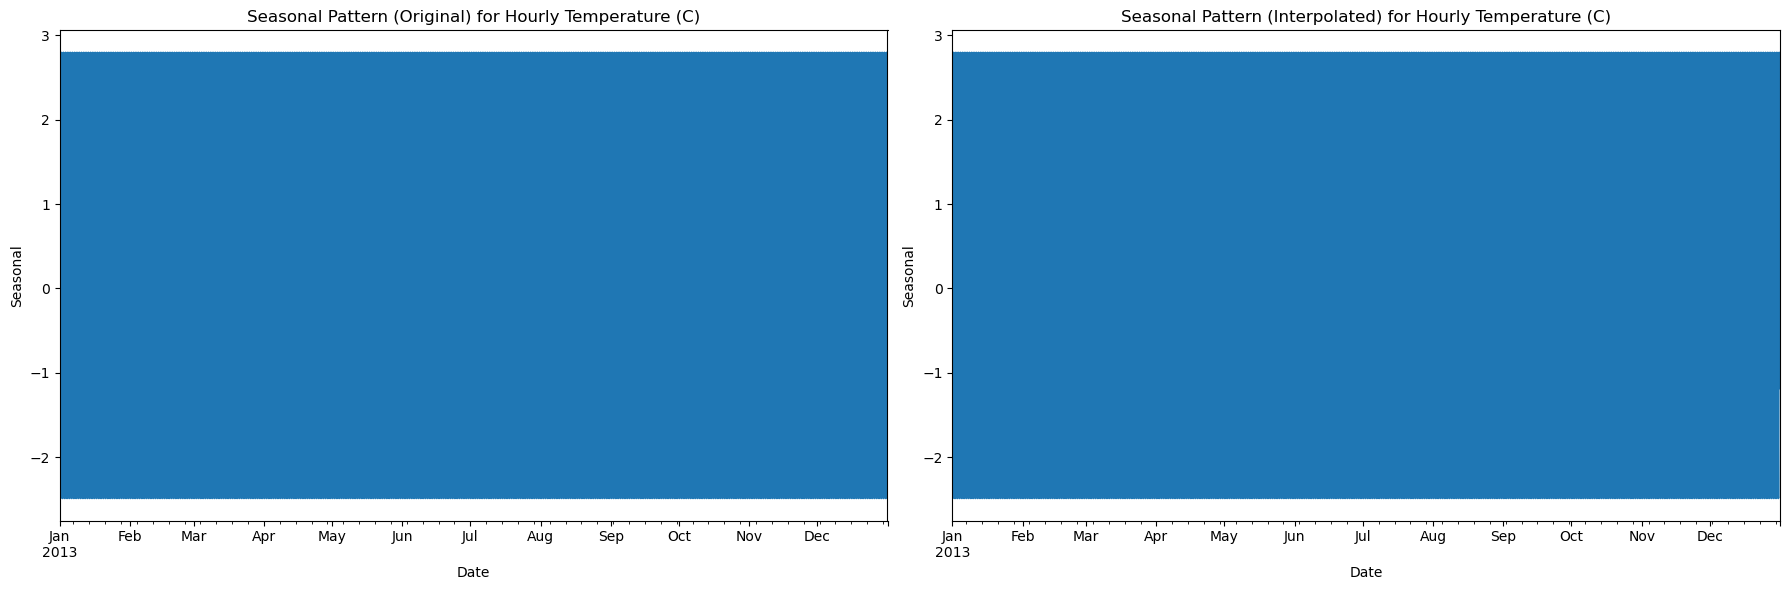

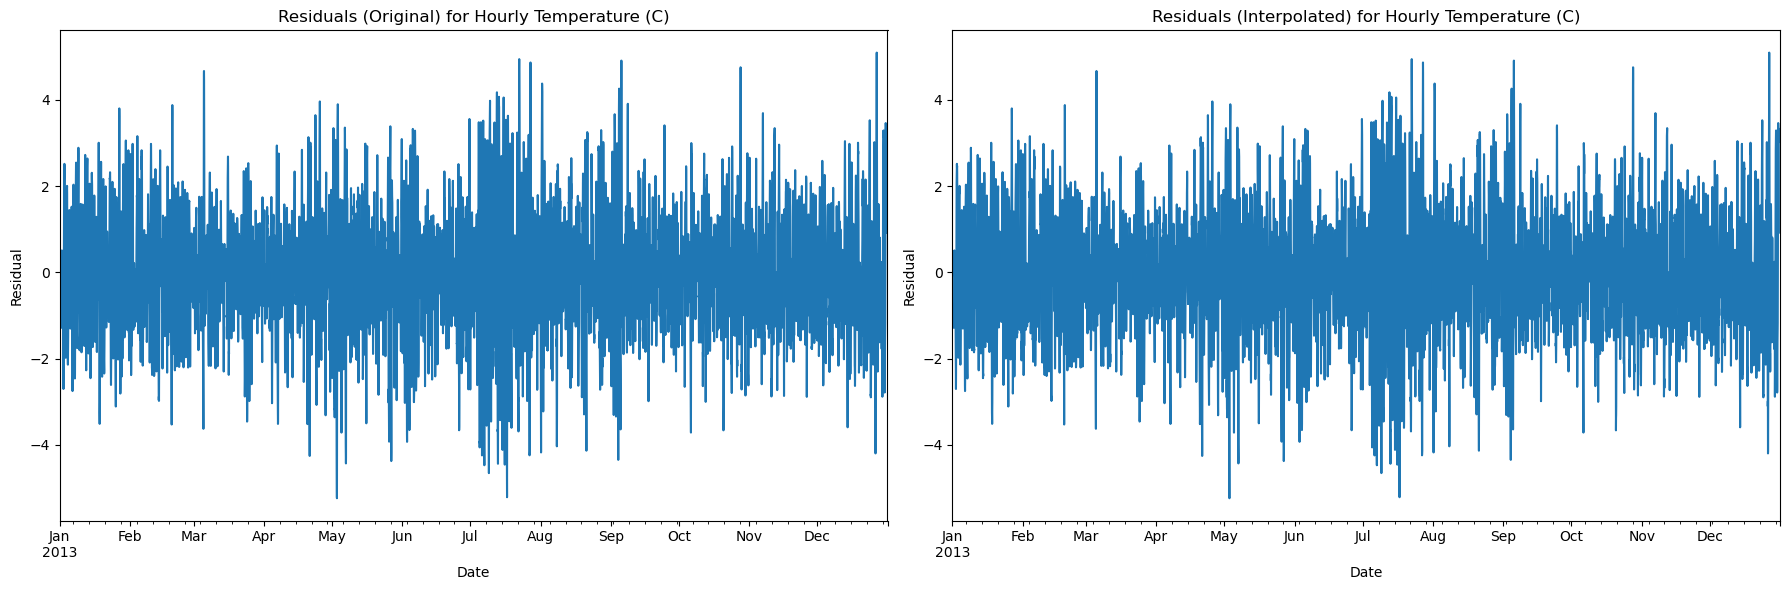

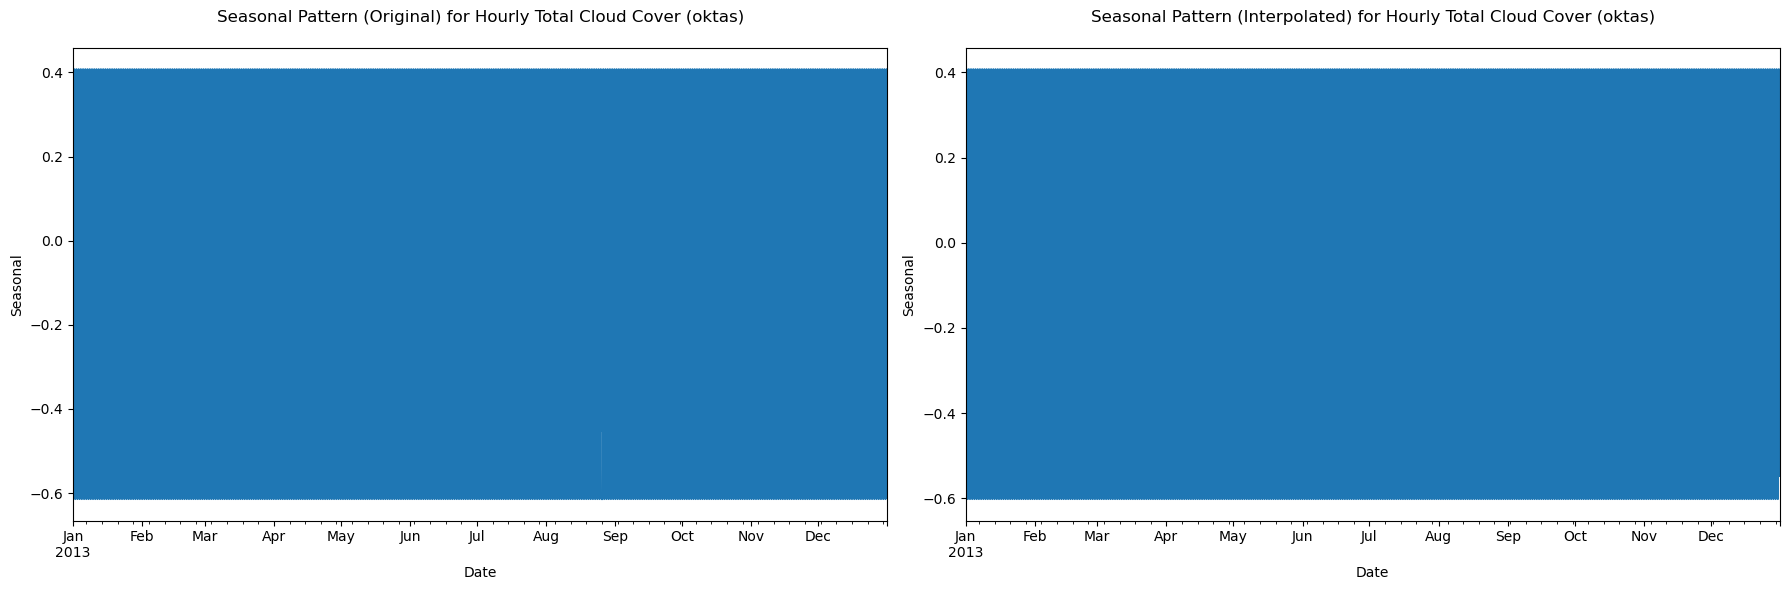

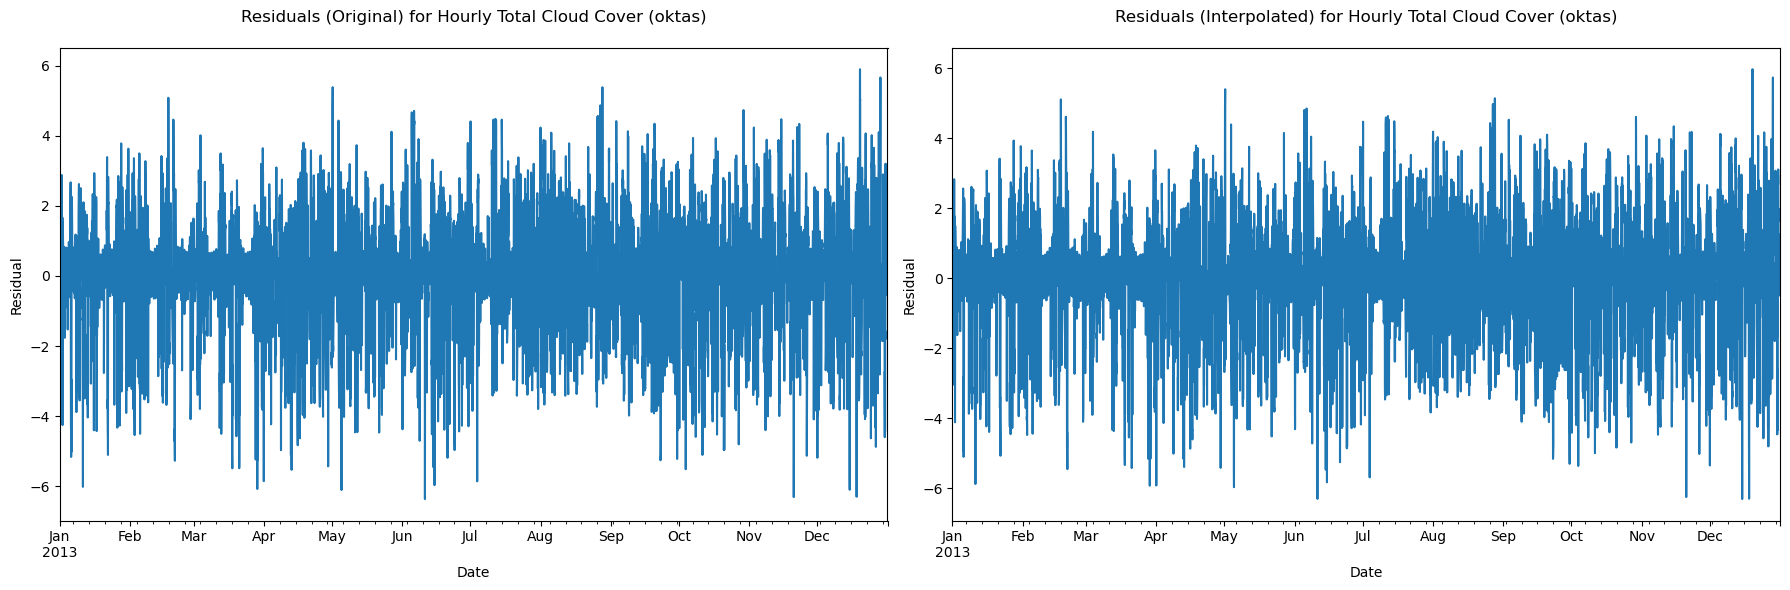

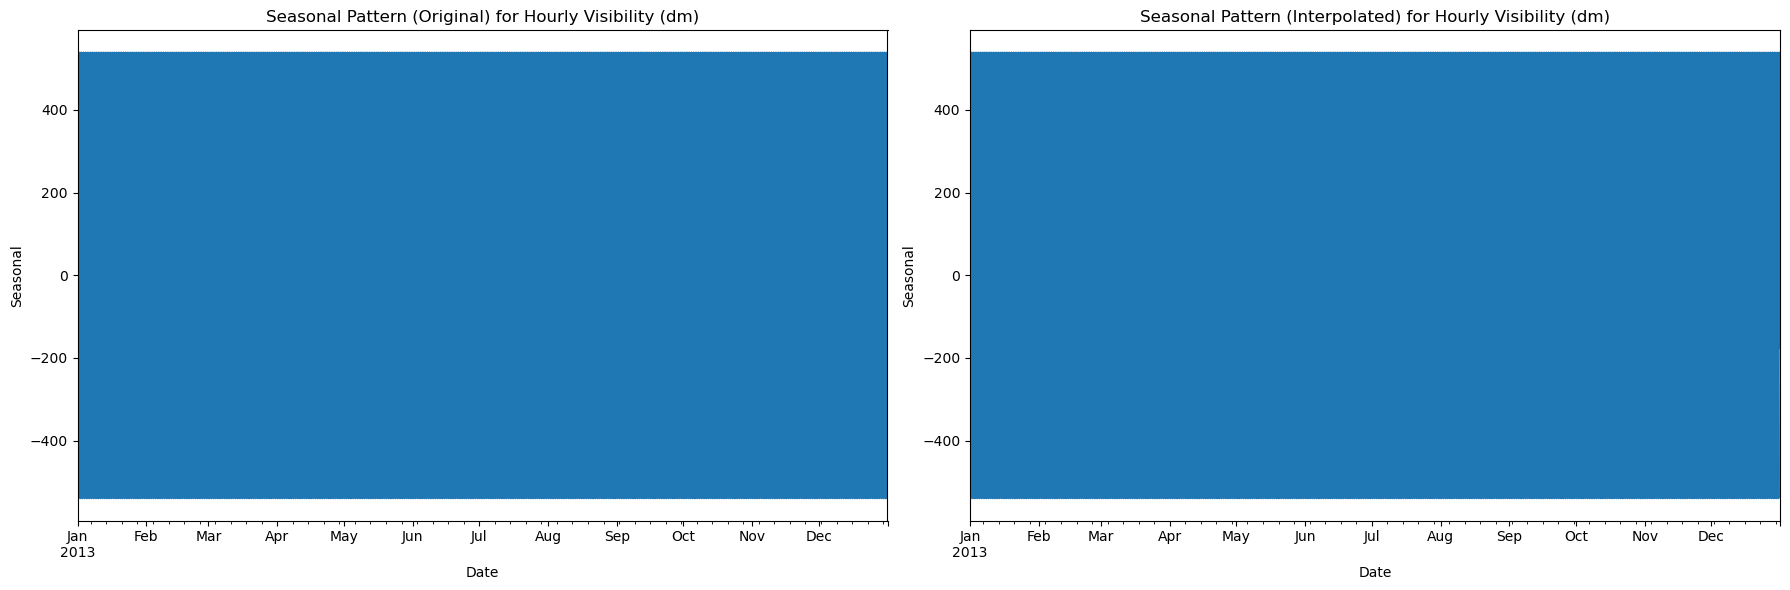

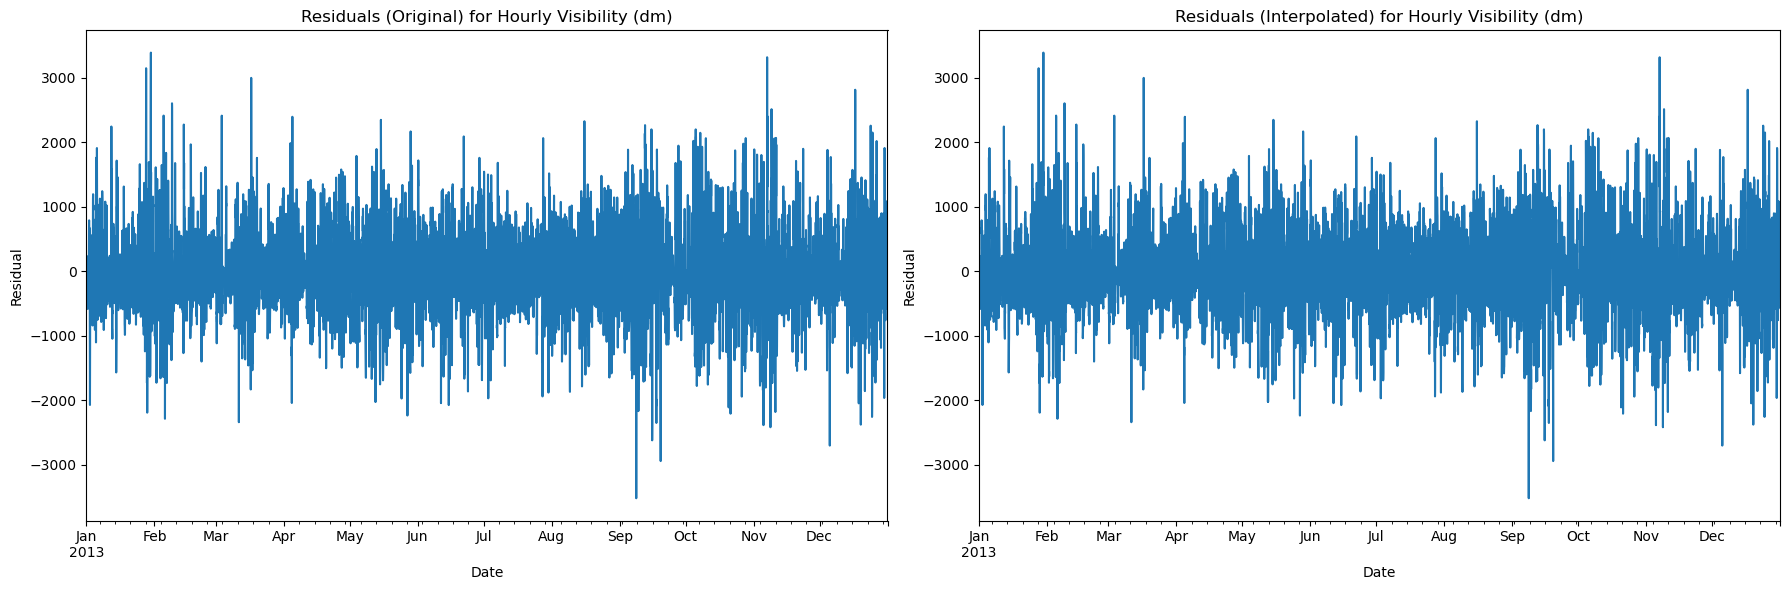

In [35]:
#Plotting the decomposition of the seasonal pattern and residuals for each weather variable

from statsmodels.tsa.seasonal import seasonal_decompose
for col in average_original_mean.columns.intersection(final_weather.columns):

    decomposition_interpolated = seasonal_decompose(final_weather[col].dropna(), model='additive', period=24)

    original_no_na = average_original_mean[col].dropna()
    decomposition_original = seasonal_decompose(original_no_na, model='additive', period=24)

    masked_seasonal_original = average_original_mean[col].copy()
    masked_seasonal_original[~masked_seasonal_original.isna()] = decomposition_original.seasonal.values

    masked_resid_original = average_original_mean[col].copy()
    masked_resid_original[~masked_resid_original.isna()] = decomposition_original.resid.values
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    masked_seasonal_original.plot(ax=axes[0])
    axes[0].set_title(f'Seasonal Pattern (Original) for {col}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Seasonal')
    
    decomposition_interpolated.seasonal.plot(ax=axes[1])
    axes[1].set_title(f'Seasonal Pattern (Interpolated) for {col}')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Seasonal')
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    masked_resid_original.plot(ax=axes[0])
    axes[0].set_title(f'Residuals (Original) for {col}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Residual')
    
    decomposition_interpolated.resid.plot(ax=axes[1])
    axes[1].set_title(f'Residuals (Interpolated) for {col}')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Residual')
    
    plt.tight_layout()
    plt.show()

Converting final and cleaned weather data to csv

In [36]:
#Converting final_weather dataframe to csv

final_weather.to_csv('weather_cleaned.csv', index=True)